## Import

In [3]:
## IMPORT 

import os
import numpy as np
import pylab as plt
from scipy.signal import medfilt, butter, filtfilt, resample, savgol_filter
from scipy.stats import linregress, ttest_ind, pearsonr, wilcoxon
from scipy.optimize import curve_fit, minimize
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib as mpl
import h5py
from pathlib import Path
import glob
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.integrate import simpson
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, balanced_accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

In [12]:
import matplotlib

print(matplotlib.__version__)

3.10.1


## plotting params

In [6]:
# Text   
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 20
mpl.rcParams['font.family'] = '.SF Camera'

# Boxes
mpl.rcParams['axes.spines.top']= False
mpl.rcParams['axes.spines.right']= False

# plt.rcParams['figure.figsize'] = [4, 5]
plt.rcParams['figure.dpi'] = 140

## data loading + sliding window function

In [7]:

#SAM
directory = '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/sam/preprocessed/'
sam_files = glob.glob(os.path.join(directory, "*.csv"))

sam_files

#EPM 
directory = '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/epm/JrGECO_EPM/preprocessed/'
epm_files = glob.glob(os.path.join(directory, "*.csv"))

epm_files

# SLIDING WINDOW FUNCTION
def create_sliding_window(df, signal_col, target_col, window_size, step_size=30):
    X, y = [], []
    for i in range(0, len(df) - window_size, step_size):
        window_signal = df[signal_col].iloc[i:i + window_size].values
        window_labels = df[target_col].iloc[i:i + window_size]
        if len(window_labels.unique()) == 1:  # Ensure all labels in the window are the same
            X.append(window_signal)
            y.append(window_labels.iloc[0])
    return np.array(X), np.array(y)

print(sam_files, epm_files)

['/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/sam/preprocessed/152_F_preprocessed.csv', '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/sam/preprocessed/71_F_preprocessed.csv', '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/sam/preprocessed/84_M_preprocessed.csv', '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/sam/preprocessed/151_F_preprocessed.csv', '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/sam/preprocessed/64_M_preprocessed.csv', '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/sam/preprocessed/67_M_preprocessed.csv', '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/sam/preprocessed/66_M_preprocessed.csv', '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/sam/preprocessed/65_M_preprocessed.csv', '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/sam/preprocessed/68_F_preprocessed.csv', '/Users/ossamagh

## Full decoder

### EPM to SAM, SAM to EPM

### Neuro/astro vs shuffled

Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3

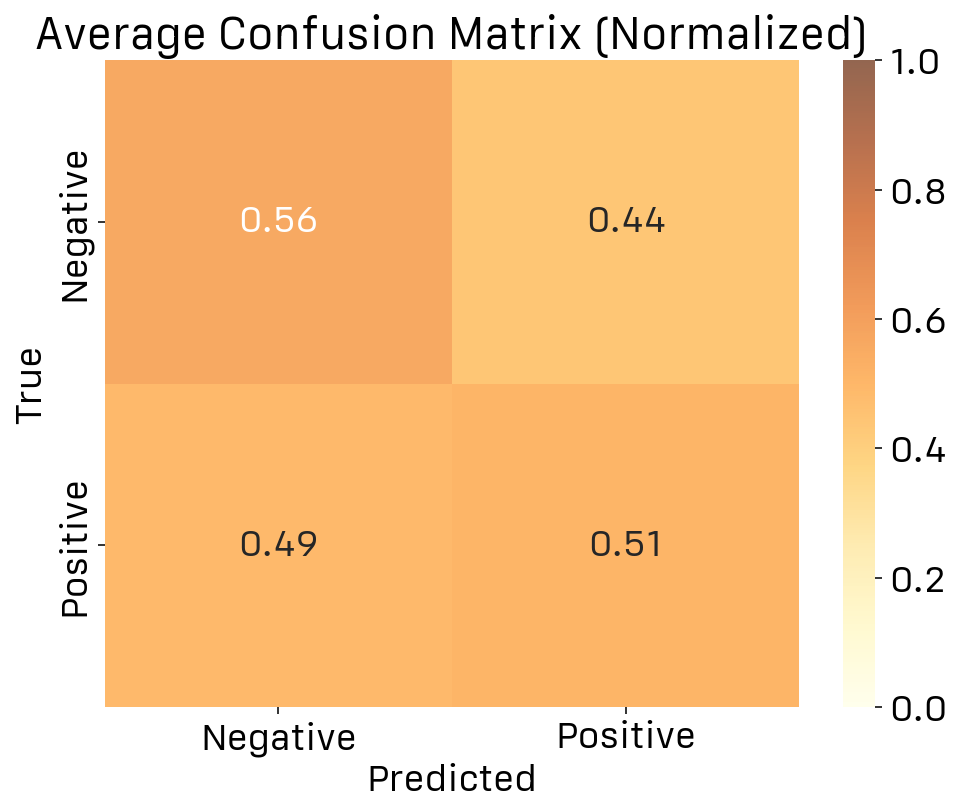

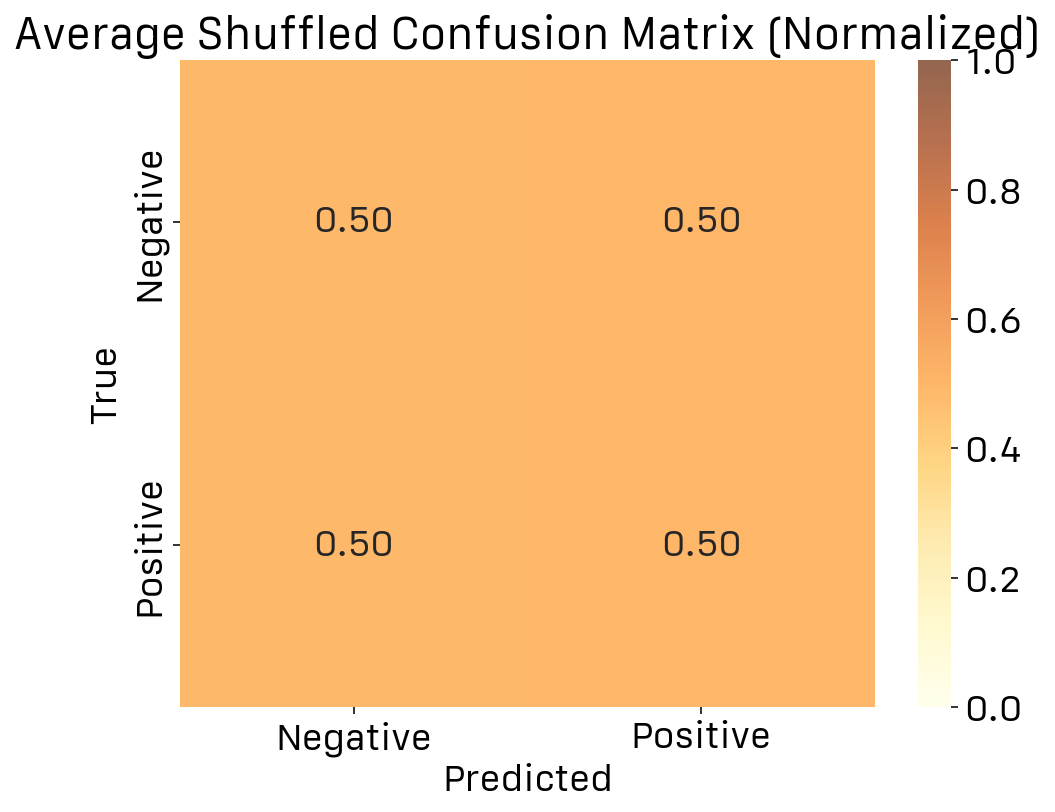

In [ ]:
## One decoder per mouse, output average confusion matrix 

# Initialize results storage
confusion_matrices = []
shuffled_confusion_matrices = []
results = {'ID': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': [], '1_f1': [], '0_f1': [], 'AUC_ROC': [],
           'Shuffled_ID': [], 'Shuffled_Accuracy': [], 'Shuffled_Precision': [], 'Shuffled_Recall': [],
           'Shuffled_F1': [], 'Shuffled_1_f1': [], 'Shuffled_0_f1': [], 'Shuffled_AUC_ROC': []}

num_repeats = 10  # number of under-sampling repeats

for efile, sfile in zip(epm_files, sam_files):
    epm = pd.read_csv(efile)
    sam = pd.read_csv(sfile)
    id = epm['ID'].iloc[0]

    # Label assignment
    epm['exploration'] = np.where(epm['In Closed Arms'] == 1, 0, 1)
    sam['exploration'] = np.where(sam['In black'] == 1, 0, 1)

    epm = epm[['Zscorer', 'Zscoreg', 'Time', 'exploration', 'ID']]
    sam = sam[['Zscorer', 'Zscoreg', 'Time', 'exploration', 'ID']]

    window_size = 300

    X_train, y_train = create_sliding_window(epm, signal_col='Zscorer', target_col='exploration', window_size=window_size)
    X_test, y_test = create_sliding_window(sam, signal_col='Zscorer', target_col='exploration', window_size=window_size)

    for repeat_idx in range(num_repeats):
        print(f"Repeat {repeat_idx + 1}/{num_repeats}")

        # Random undersampling
        undersampler = RandomUnderSampler(random_state=repeat_idx, sampling_strategy=1)
        X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

        # Hyperparameter tuning
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
        lr_model = LogisticRegression(penalty='l2', random_state=42, max_iter=5000, class_weight='balanced', solver='liblinear')
        grid_search = GridSearchCV(lr_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_resampled, y_train_resampled)

        # Get best model
        best_model = grid_search.best_estimator_
        best_model.fit(X_train_resampled, y_train_resampled)
        
        # Predict probabilities for AUC-ROC calculation
        y_pred_proba = best_model.predict_proba(X_test)
        y_pred = best_model.predict(X_test)

        # Compute AUC-ROC
        auc_roc = roc_auc_score(y_test, y_pred_proba[:, 1])

        # Evaluate model
        cm = confusion_matrix(y_test, y_pred, normalize='true')
        confusion_matrices.append(cm)

        report = classification_report(y_test, y_pred, output_dict=True)
        results['ID'].append(id)
        results['Accuracy'].append(report['accuracy'])
        results['Precision'].append(report['weighted avg']['precision'])
        results['Recall'].append(report['weighted avg']['recall'])
        results['F1'].append(report['weighted avg']['f1-score'])
        results['1_f1'].append(report['1']['f1-score'])
        results['0_f1'].append(report['0']['f1-score'])
        results['AUC_ROC'].append(auc_roc)

        # Shuffle and evaluate
        num_permutations = 50
        shuffled_cm_list = []
        shuffled_results_list = []

        for i in range(num_permutations):
            np.random.seed(42 + i)
            np.random.shuffle(y_train_resampled)

            best_model.fit(X_train_resampled, y_train_resampled)
            y_pred_shuffled_proba = best_model.predict_proba(X_test)
            y_pred_shuffled = best_model.predict(X_test)

            shuffled_auc_roc = roc_auc_score(y_test, y_pred_shuffled_proba[:, 1])

            shuffled_report = classification_report(y_test, y_pred_shuffled, output_dict=True)
            shuffled_results_list.append({
                'Shuffled_Accuracy': shuffled_report['accuracy'],
                'Shuffled_Precision': shuffled_report['macro avg']['precision'],
                'Shuffled_Recall': shuffled_report['macro avg']['recall'],
                'Shuffled_F1': shuffled_report['macro avg']['f1-score'],
                'Shuffled_1_f1': shuffled_report['1']['f1-score'],
                'Shuffled_0_f1': shuffled_report['0']['f1-score'],
                'Shuffled_AUC_ROC': shuffled_auc_roc
            })

            cm_shuffled = confusion_matrix(y_test, y_pred_shuffled, normalize='true')
            shuffled_cm_list.append(cm_shuffled)

        avg_shuffled_cm = np.mean(shuffled_cm_list, axis=0)
        shuffled_average_results = {
            key: np.mean([res[key] for res in shuffled_results_list]) for key in shuffled_results_list[0]
        }

        results['Shuffled_ID'].append(id)
        results['Shuffled_Accuracy'].append(shuffled_average_results['Shuffled_Accuracy'])
        results['Shuffled_Precision'].append(shuffled_average_results['Shuffled_Precision'])
        results['Shuffled_Recall'].append(shuffled_average_results['Shuffled_Recall'])
        results['Shuffled_F1'].append(shuffled_average_results['Shuffled_F1'])
        results['Shuffled_1_f1'].append(shuffled_average_results['Shuffled_1_f1'])
        results['Shuffled_0_f1'].append(shuffled_average_results['Shuffled_0_f1'])
        results['Shuffled_AUC_ROC'].append(shuffled_average_results['Shuffled_AUC_ROC'])

        shuffled_confusion_matrices.append(avg_shuffled_cm)

# Average confusion matrices
average_cm = np.mean(confusion_matrices, axis=0)
shuffled_average_cm = np.mean(shuffled_confusion_matrices, axis=0)

# Calculate average results for each ID
average_results = pd.DataFrame(results).groupby('ID').mean()
print(average_results)

# Plot confusion matrices
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='YlOrBr', alpha=0.7, vmin=0, vmax=1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix (Normalized)')
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jRGECOEPMtoSAM_CM.pdf', format='pdf')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(shuffled_average_cm, annot=True, fmt='.2f', cmap='YlOrBr', alpha=0.7, vmin=0, vmax=1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Shuffled Confusion Matrix (Normalized)')
plt.show()


### plotting scoring metrics

     Accuracy  Precision    Recall        F1      1_f1      0_f1   AUC_ROC  \
ID                                                                           
63   0.553802   0.530351  0.535466  0.519630  0.394132  0.645127  0.553214   
64   0.525081   0.522106  0.522404  0.520361  0.475745  0.564977  0.540043   
65   0.611189   0.594076  0.592069  0.592572  0.505659  0.679484  0.637105   
66   0.472693   0.468754  0.451332  0.418278  0.240390  0.596166  0.475217   
67   0.460314   0.449581  0.445417  0.442375  0.342691  0.542060  0.424068   
68   0.536182   0.521442  0.545660  0.454609  0.245009  0.664209  0.556133   
70   0.562056   0.483552  0.451155  0.411615  0.114549  0.708681  0.446611   
71   0.615795   0.599829  0.721318  0.542410  0.362182  0.722638  0.810131   
84   0.639439   0.575748  0.665310  0.541602  0.330002  0.753202  0.731489   
150  0.489531   0.472099  0.458951  0.431955  0.252035  0.611875  0.444448   
151  0.500899   0.502532  0.502857  0.487195  0.404143  0.570247

/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_45828/4126731347.py:25: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


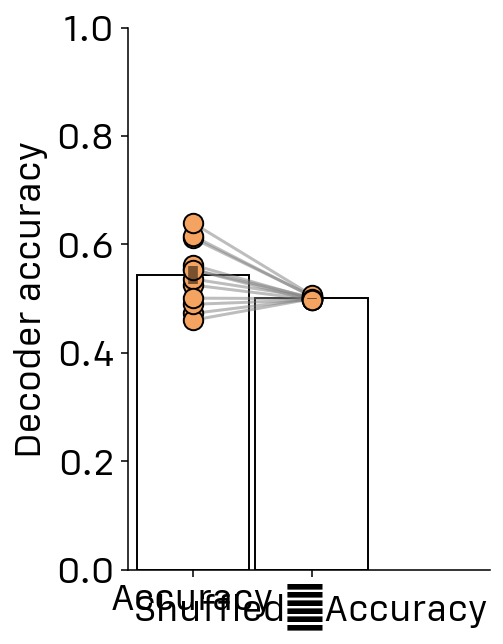

In [10]:

df = average_results.copy()
df2=df.copy()
print(df)

plt.figure(figsize=(4,5))
conditions = ['Accuracy', 'Shuffled_Accuracy']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
ttest_results = ttest_ind(df['Accuracy'], df['Shuffled_Accuracy'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['Accuracy'], row['Shuffled_Accuracy']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder accuracy')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/SAMtoEPM_Neuro_Accuracy.pdf', format='pdf')
plt.show()

     Accuracy  Precision    Recall        F1      1_f1      0_f1   AUC_ROC  \
ID                                                                           
63   0.553802   0.530351  0.535466  0.519630  0.394132  0.645127  0.553214   
64   0.525081   0.522106  0.522404  0.520361  0.475745  0.564977  0.540043   
65   0.611189   0.594076  0.592069  0.592572  0.505659  0.679484  0.637105   
66   0.472693   0.468754  0.451332  0.418278  0.240390  0.596166  0.475217   
67   0.460314   0.449581  0.445417  0.442375  0.342691  0.542060  0.424068   
68   0.536182   0.521442  0.545660  0.454609  0.245009  0.664209  0.556133   
70   0.562056   0.483552  0.451155  0.411615  0.114549  0.708681  0.446611   
71   0.615795   0.599829  0.721318  0.542410  0.362182  0.722638  0.810131   
84   0.639439   0.575748  0.665310  0.541602  0.330002  0.753202  0.731489   
150  0.489531   0.472099  0.458951  0.431955  0.252035  0.611875  0.444448   
151  0.500899   0.502532  0.502857  0.487195  0.404143  0.570247

/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_45828/2951881322.py:30: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


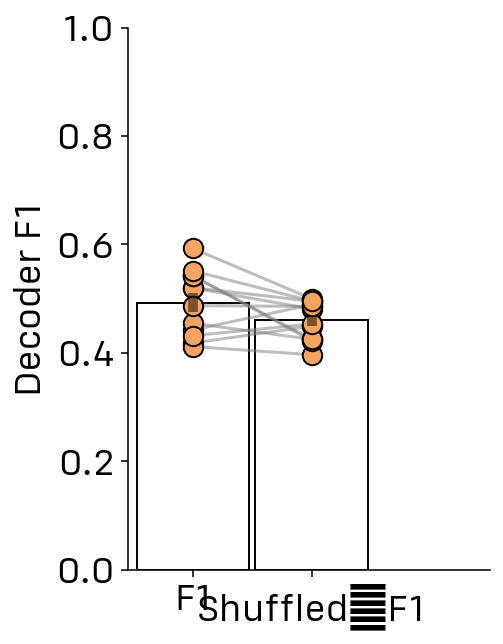

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from matplotlib.ticker import MaxNLocator

df = pd.DataFrame(average_results)
df2=df.copy()
print(df)

plt.figure(figsize=(4,5))
conditions = ['F1', 'Shuffled_F1']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
ttest_results = ttest_ind(df['F1'], df['Shuffled_F1'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['F1'], row['Shuffled_F1']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder F1')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/Neuro_EPMtoSAM_F1.pdf', format='pdf')
plt.show()

     Accuracy  Precision    Recall        F1      1_f1      0_f1   AUC_ROC  \
ID                                                                           
63   0.553802   0.610478  0.553802  0.570239  0.394132  0.645127  0.553214   
64   0.525081   0.532227  0.525081  0.526776  0.475745  0.564977  0.540043   
65   0.611189   0.607721  0.611189  0.608982  0.505659  0.679484  0.637105   
66   0.472693   0.648091  0.472693  0.524740  0.240390  0.596166  0.475217   
67   0.460314   0.491073  0.460314  0.470761  0.342691  0.542060  0.424068   
68   0.536182   0.788822  0.536182  0.608475  0.245009  0.664209  0.556133   
70   0.562056   0.823206  0.562056  0.655603  0.114549  0.708681  0.446611   
71   0.615795   0.876403  0.615795  0.677581  0.362182  0.722638  0.810131   
84   0.639439   0.844046  0.639439  0.699412  0.330002  0.753202  0.731489   
150  0.489531   0.637796  0.489531  0.535099  0.252035  0.611875  0.444448   
151  0.500899   0.558435  0.500899  0.514990  0.404143  0.570247

/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_50820/2742185110.py:30: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


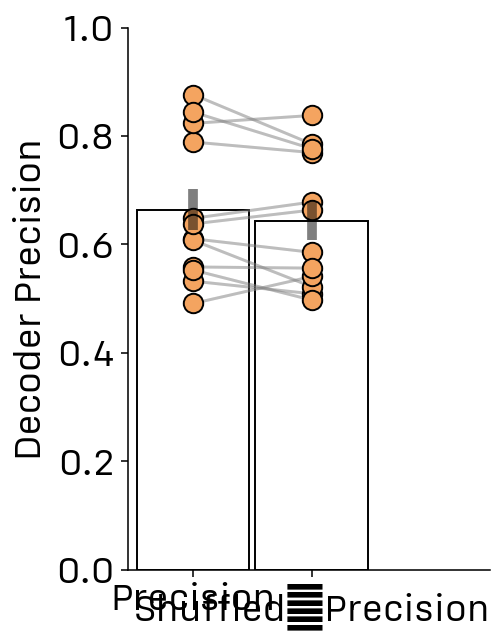

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from matplotlib.ticker import MaxNLocator

df = pd.DataFrame(average_results)
df2 = df.copy()
print(df)

plt.figure(figsize=(4, 5))
conditions = ['Precision', 'Shuffled_Precision']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
ttest_results = ttest_ind(df['Precision'], df['Shuffled_Precision'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
    zorder=0)
for condition in conditions:
    plt.scatter([condition] * len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['Precision'], row['Shuffled_Precision']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder Precision')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55, 3 - 0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/EPMtoSAM_Precision.pdf', format='pdf')
plt.show()

     Accuracy  Precision    Recall        F1      1_f1      0_f1   AUC_ROC  \
ID                                                                           
63   0.553802   0.610478  0.553802  0.570239  0.394132  0.645127  0.553214   
64   0.525081   0.532227  0.525081  0.526776  0.475745  0.564977  0.540043   
65   0.611189   0.607721  0.611189  0.608982  0.505659  0.679484  0.637105   
66   0.472693   0.648091  0.472693  0.524740  0.240390  0.596166  0.475217   
67   0.460314   0.491073  0.460314  0.470761  0.342691  0.542060  0.424068   
68   0.536182   0.788822  0.536182  0.608475  0.245009  0.664209  0.556133   
70   0.562056   0.823206  0.562056  0.655603  0.114549  0.708681  0.446611   
71   0.615795   0.876403  0.615795  0.677581  0.362182  0.722638  0.810131   
84   0.639439   0.844046  0.639439  0.699412  0.330002  0.753202  0.731489   
150  0.489531   0.637796  0.489531  0.535099  0.252035  0.611875  0.444448   
151  0.500899   0.558435  0.500899  0.514990  0.404143  0.570247

/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_50820/4243989645.py:29: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


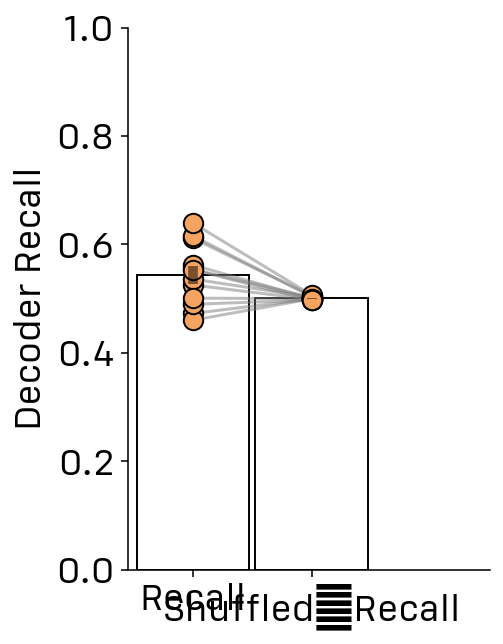

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from matplotlib.ticker import MaxNLocator

df = pd.DataFrame(average_results)
df2 = df.copy()
print(df)

plt.figure(figsize=(4,5))
conditions = ['Recall', 'Shuffled_Recall']
means = df[conditions].mean(axis=0)
sems = df[conditions].sem(axis=0)
ttest_results = ttest_ind(df['Recall'], df['Shuffled_Recall'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['Recall'], row['Shuffled_Recall']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder Recall')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/EPMtoSAM_Recall.pdf', format='pdf')
plt.show()

## neuro vs astro

Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3

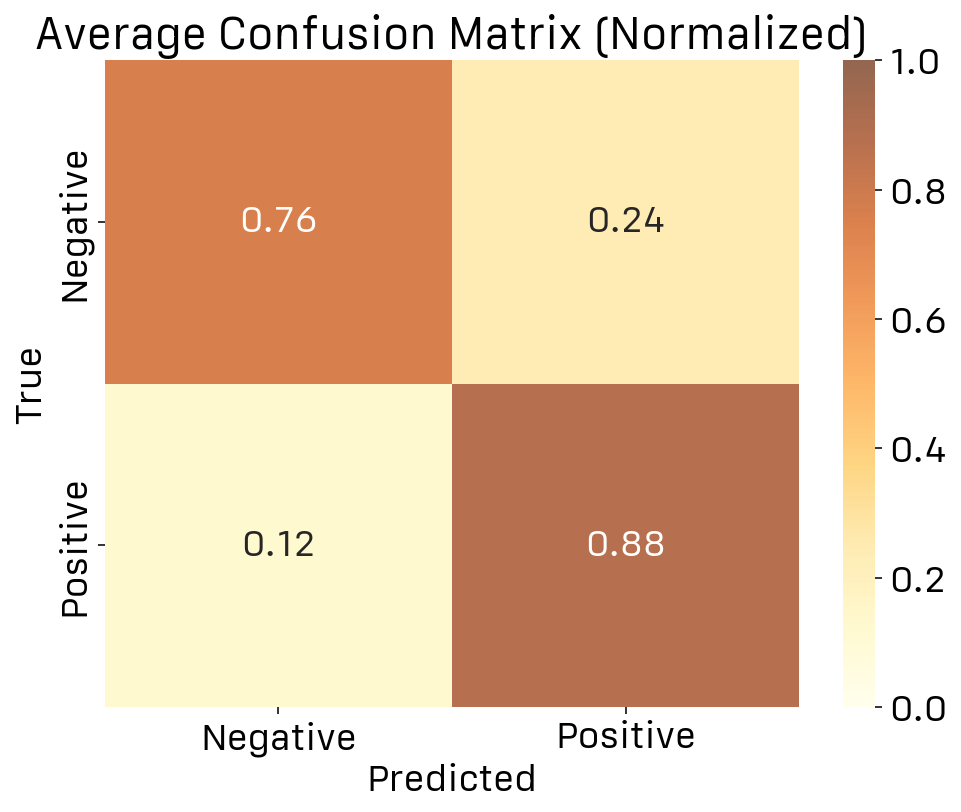

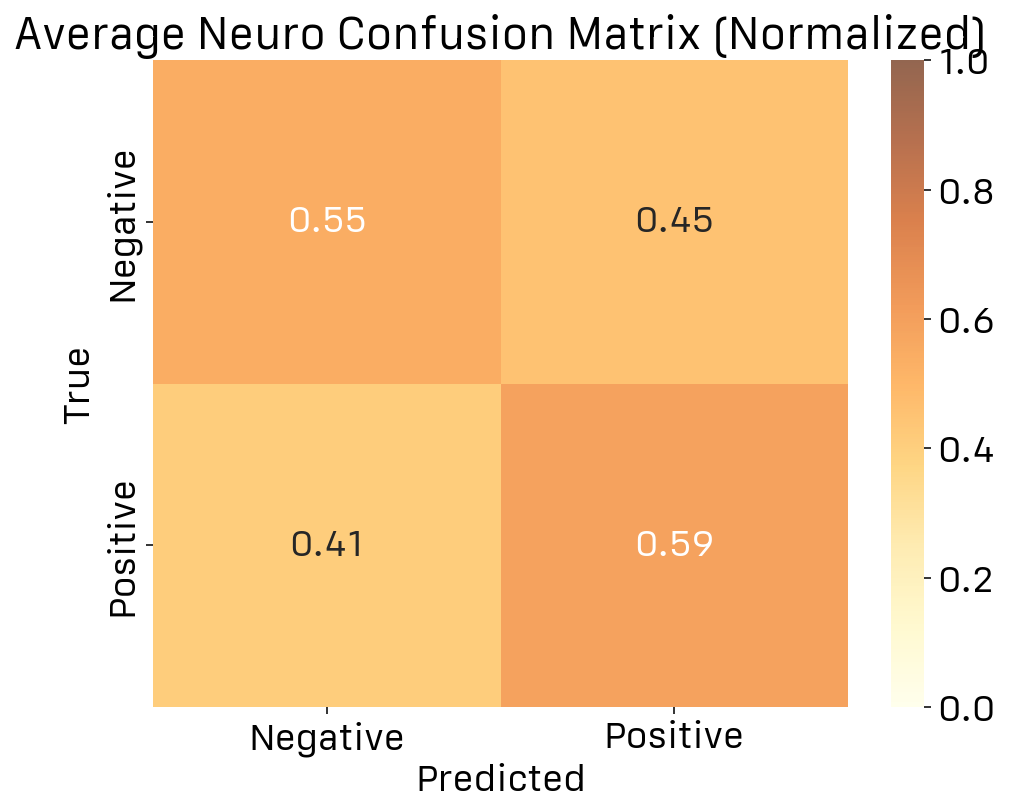

In [ ]:
## One decoder per mouse, output average confusion matrix 

# Initialize results storage
confusion_matrices = []
neuro_confusion_matrices = []
results = {'ID': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': [], '1_f1': [], '0_f1': [], 'AUC_ROC': [],
           'Neuro_ID': [], 'Neuro_Accuracy': [], 'Neuro_Precision': [], 'Neuro_Recall': [],
           'Neuro_F1': [], 'Neuro_1_f1': [], 'Neuro_0_f1': [], 'Neuro_AUC_ROC': []}

num_repeats = 10  # number of under-sampling repeats

for efile, sfile in zip(epm_files, sam_files):
    epm = pd.read_csv(efile)
    sam = pd.read_csv(sfile)
    id = epm['ID'].iloc[0]

    # Label assignment
    epm['exploration'] = np.where(epm['In Closed Arms'] == 1, 0, 1)
    sam['exploration'] = np.where(sam['In black'] == 1, 0, 1)

    epm = epm[['Zscoreg', 'Zscorer', 'Time', 'exploration', 'ID']]
    sam = sam[['Zscoreg', 'Zscorer', 'Time', 'exploration', 'ID']]

    window_size = 300

    X_train, y_train = create_sliding_window(sam, signal_col='Zscoreg', target_col='exploration', window_size=window_size)
    X_test, y_test = create_sliding_window(epm, signal_col='Zscoreg', target_col='exploration', window_size=window_size)

    neuro_X_train, neuro_y_train = create_sliding_window(sam, signal_col='Zscorer', target_col='exploration', window_size=window_size)
    neuro_X_test, neuro_y_test = create_sliding_window(epm, signal_col='Zscorer', target_col='exploration', window_size=window_size)

    for repeat_idx in range(num_repeats):
        print(f"Repeat {repeat_idx + 1}/{num_repeats}")

        # Random undersampling
        undersampler = RandomUnderSampler(random_state=repeat_idx, sampling_strategy=1)
        X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


        # Hyperparameter tuning
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
        lr_model = LogisticRegression(penalty='l2', random_state=42, max_iter=5000, class_weight='balanced', solver='liblinear')
        grid_search = GridSearchCV(lr_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_resampled, y_train_resampled)

        # Get best model
        best_model = grid_search.best_estimator_
        best_model.fit(X_train_resampled, y_train_resampled)
        
        # Predict probabilities for AUC-ROC calculation
        y_pred_proba = best_model.predict_proba(X_test)
        y_pred = best_model.predict(X_test)

        # Compute AUC-ROC
        auc_roc = roc_auc_score(y_test, y_pred_proba[:, 1])

        # Evaluate model
        cm = confusion_matrix(y_test, y_pred, normalize='true')
        confusion_matrices.append(cm)

        report = classification_report(y_test, y_pred, output_dict=True)
        results['ID'].append(id)
        results['Accuracy'].append(report['accuracy'])
        results['Precision'].append(report['weighted avg']['precision'])
        results['Recall'].append(report['weighted avg']['recall'])
        results['F1'].append(report['weighted avg']['f1-score'])
        results['1_f1'].append(report['1']['f1-score'])
        results['0_f1'].append(report['0']['f1-score'])
        results['AUC_ROC'].append(auc_roc)

# Neural data 

        # Random undersampling
        undersampler = RandomUnderSampler(random_state=repeat_idx, sampling_strategy=1)
        neuro_X_train_resampled, neuro_y_train_resampled = undersampler.fit_resample(neuro_X_train, neuro_y_train)
        

        # Hyperparameter tuning
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
        lr_model = LogisticRegression(penalty='l2', random_state=42, max_iter=5000, class_weight='balanced', solver='liblinear')
        grid_search = GridSearchCV(lr_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(neuro_X_train_resampled, neuro_y_train_resampled)

        # Get best model
        neuro_best_model = grid_search.best_estimator_
        neuro_best_model.fit(neuro_X_train_resampled, neuro_y_train_resampled)
        
        # Predict probabilities for AUC-ROC calculation
        neuro_y_pred_proba = neuro_best_model.predict_proba(neuro_X_test)
        neuro_y_pred = neuro_best_model.predict(neuro_X_test)

        # Compute AUC-ROC
        neuro_auc_roc = roc_auc_score(neuro_y_test, neuro_y_pred_proba[:, 1])

        # Evaluate model
        neuro_cm = confusion_matrix(neuro_y_test, neuro_y_pred, normalize='true')
        neuro_confusion_matrices.append(neuro_cm)

        neuro_report = classification_report(neuro_y_test, neuro_y_pred, output_dict=True)
        results['Neuro_ID'].append(id)
        results['Neuro_Accuracy'].append(neuro_report['accuracy'])
        results['Neuro_Precision'].append(neuro_report['weighted avg']['precision'])
        results['Neuro_Recall'].append(neuro_report['weighted avg']['recall'])
        results['Neuro_F1'].append(neuro_report['weighted avg']['f1-score'])
        results['Neuro_1_f1'].append(neuro_report['1']['f1-score'])
        results['Neuro_0_f1'].append(neuro_report['0']['f1-score'])
        results['Neuro_AUC_ROC'].append(neuro_auc_roc)

# Average confusion matrices
average_cm = np.mean(confusion_matrices, axis=0)
neuro_average_cm = np.mean(neuro_confusion_matrices, axis=0)

# Calculate average results for each ID
average_results = pd.DataFrame(results).groupby('ID').mean()
print(average_results)

# Plot confusion matrices
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='YlOrBr', alpha=0.7, vmin=0, vmax=1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix (Normalized)')
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jRGECOEPMtoSAM_CM.pdf', format='pdf')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(neuro_average_cm, annot=True, fmt='.2f', cmap='YlOrBr', alpha=0.7, vmin=0, vmax=1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Neuro Confusion Matrix (Normalized)')
plt.show()

     Accuracy  Precision    Recall        F1      1_f1      0_f1   AUC_ROC  \
ID                                                                           
63   0.810756   0.957159  0.810756  0.859911  0.369199  0.888679  0.997908   
64   0.707120   0.897126  0.707120  0.749932  0.494902  0.793760  0.971066   
65   0.771128   0.931480  0.771128  0.816151  0.461471  0.854640  0.991310   
66   0.653085   0.735974  0.653085  0.678599  0.421220  0.751106  0.716718   
67   0.817292   0.915243  0.817292  0.839726  0.632409  0.878422  0.972214   
68   0.794554   0.966160  0.794554  0.855823  0.283987  0.879994  0.987619   
70   0.683302   0.982288  0.683302  0.794394  0.105957  0.807557  0.999857   
71   0.775486   0.842896  0.775486  0.801931  0.341092  0.864055  0.744228   
84   0.961700   0.976898  0.961700  0.966116  0.746897  0.979280  0.998090   
150  0.607911   0.835424  0.607911  0.670692  0.326284  0.723484  0.734834   
151  0.901950   0.925891  0.901950  0.906864  0.816264  0.933133

/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/3793995180.py:28: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/3793995180.py:29: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/EPMtoSAM_Neuro_Astro_Accuracy.pdf', format='pdf')
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


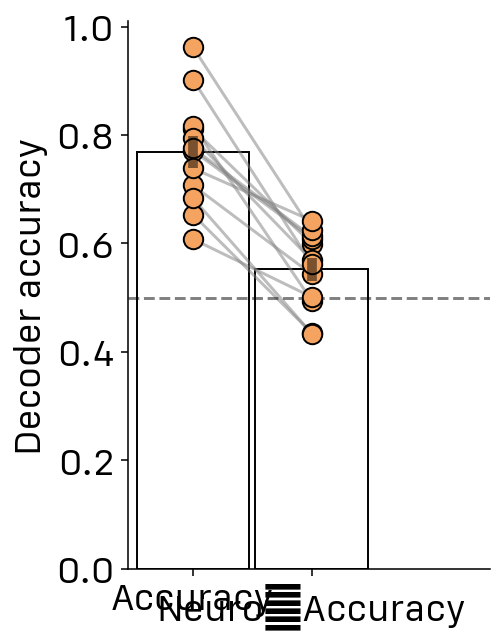

In [ ]:

df = average_results.copy()
df2=df.copy()
print(df)


plt.figure(figsize=(4,5))
conditions = ['Accuracy', 'Neuro_Accuracy']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['Accuracy'], df['Neuro_Accuracy'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['Accuracy'], row['Neuro_Accuracy']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder accuracy')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/EPMtoSAM_Neuro_Astro_Accuracy.pdf', format='pdf')
plt.show()

AUC_ROC          0.910158
Neuro_AUC_ROC    0.585744
dtype: float64
AUC_ROC          0.033425
Neuro_AUC_ROC    0.049279
dtype: float64
TtestResult(statistic=np.float64(5.448177588454008), pvalue=np.float64(1.79266453309693e-05), df=np.float64(22.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/2765373192.py:27: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/2765373192.py:28: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/EPMtoSAM_Neuro_Astro_AUCROC.pdf', format='pdf')
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


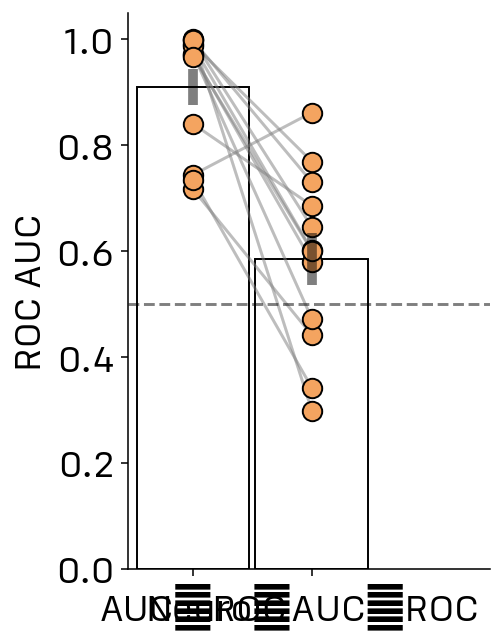

In [ ]:
## ROC AUC
df = average_results.copy()
df2=df.copy()

plt.figure(figsize=(4,5))
conditions = ['AUC_ROC', 'Neuro_AUC_ROC']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['AUC_ROC'], df['Neuro_AUC_ROC'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['AUC_ROC'], row['Neuro_AUC_ROC']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('ROC AUC')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/EPMtoSAM_Neuro_Astro_AUCROC.pdf', format='pdf')
plt.show()

F1          0.810302
Neuro_F1    0.633994
dtype: float64
F1          0.024704
Neuro_F1    0.021799
dtype: float64
TtestResult(statistic=np.float64(5.351300421860617), pvalue=np.float64(2.2600487263165692e-05), df=np.float64(22.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/913058513.py:28: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/913058513.py:29: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/EPMtoSAM_Neuro_Astro_F1score.pdf', format='pdf')
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


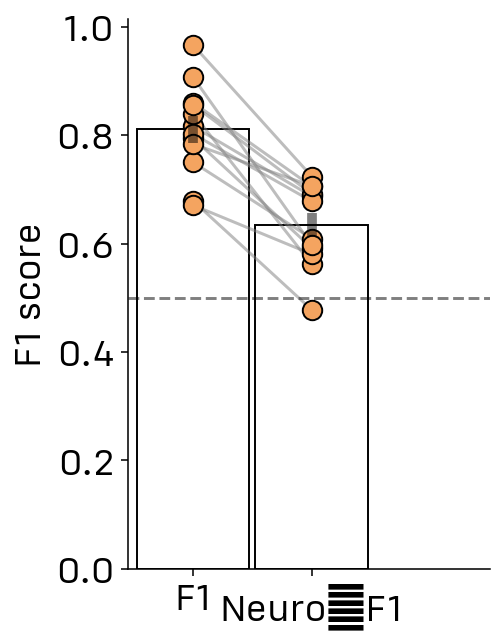

In [ ]:
##  F1 score
df = average_results.copy()
df2=df.copy()


plt.figure(figsize=(4,5))
conditions = ['F1', 'Neuro_F1']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['F1'], df['Neuro_F1'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['F1'], row['Neuro_F1']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('F1 score')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/EPMtoSAM_Neuro_Astro_F1score.pdf', format='pdf')
plt.show()

Recall          0.768561
Neuro_Recall    0.552104
dtype: float64
Recall          0.029008
Neuro_Recall    0.020724
dtype: float64
TtestResult(statistic=np.float64(6.07163079917725), pvalue=np.float64(4.124938069158983e-06), df=np.float64(22.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/1646437883.py:28: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/1646437883.py:29: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/EPMtoSAm_Neuro_Astro_Recall.pdf', format='pdf')
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


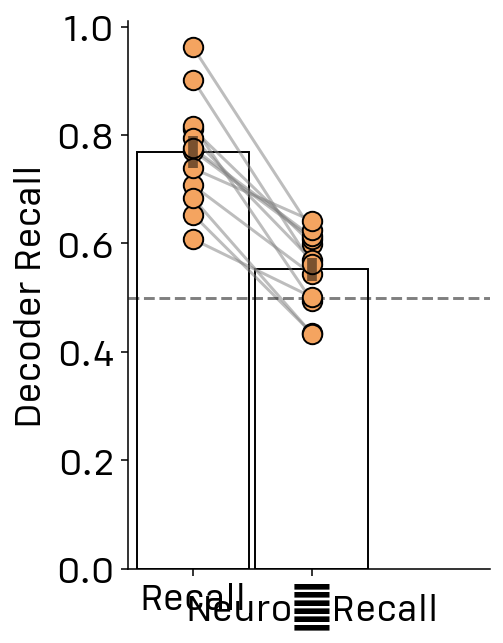

In [ ]:
##  F1 score
df = average_results.copy()
df2=df.copy()


plt.figure(figsize=(4,5))
conditions = ['Recall', 'Neuro_Recall']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['Recall'], df['Neuro_Recall'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['Recall'], row['Neuro_Recall']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder Recall')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/EPMtoSAm_Neuro_Astro_Recall.pdf', format='pdf')
plt.show()

Precision          0.904928
Neuro_Precision    0.827741
dtype: float64
Precision          0.020658
Neuro_Precision    0.031342
dtype: float64
TtestResult(statistic=np.float64(2.0562644714791785), pvalue=np.float64(0.05181075792640864), df=np.float64(22.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/1574839802.py:27: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/1574839802.py:28: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/EPMtoSAM_Neuro_Astro_Precision.pdf', format='pdf')
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


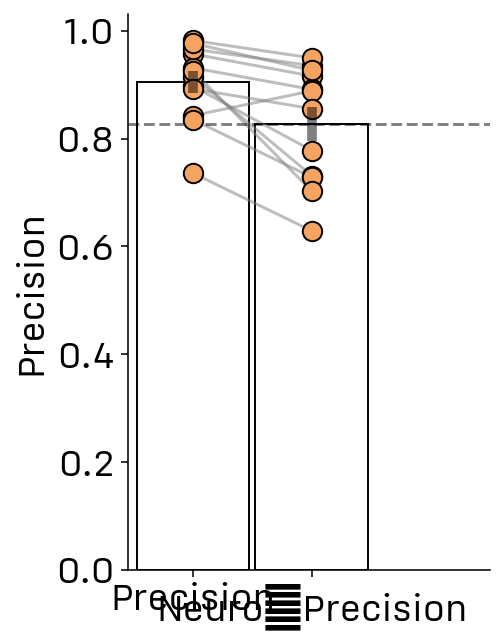

In [ ]:
##  F1 score
df = average_results.copy()
df2=df.copy()

plt.figure(figsize=(4,5))
conditions = ['Precision', 'Neuro_Precision']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['Precision'], df['Neuro_Precision'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['Precision'], row['Neuro_Precision']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Precision')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.axhline(y=means['Neuro_Precision'], color='black', linestyle='--', alpha=0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/EPMtoSAM_Neuro_Astro_Precision.pdf', format='pdf')
plt.show()

r value : 0.4039699374997658, pvalue : 0.1927899953205783, r squared : 0.16319171040356467


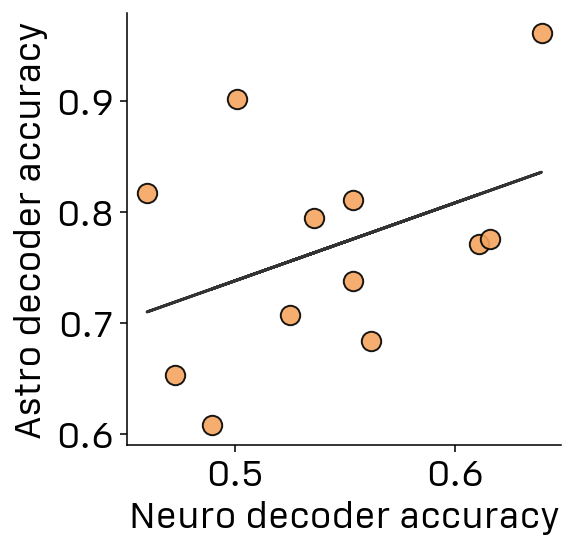

In [ ]:
## correlation between neuro and astro decoder accuracy

slope, intercept, r_value, p_value, std_err = linregress(df['Neuro_Accuracy'], df['Accuracy'])

plt.figure(figsize=(4, 4))

# Corrected the x and y for the line plot
plt.plot(df['Neuro_Accuracy'], intercept + slope * df['Neuro_Accuracy'], color='black', alpha=0.8, zorder=0)
plt.scatter(df['Neuro_Accuracy'], df['Accuracy'], alpha=0.9, color='sandybrown', edgecolor='black', s=100)

print(f'r value : {r_value}, pvalue : {p_value}, r squared : {r_value**2}')
plt.xlabel('Neuro decoder accuracy')
plt.ylabel('Astro decoder accuracy')

plt.show()

## ROC CURVE ASTRO VS NEURO

Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3

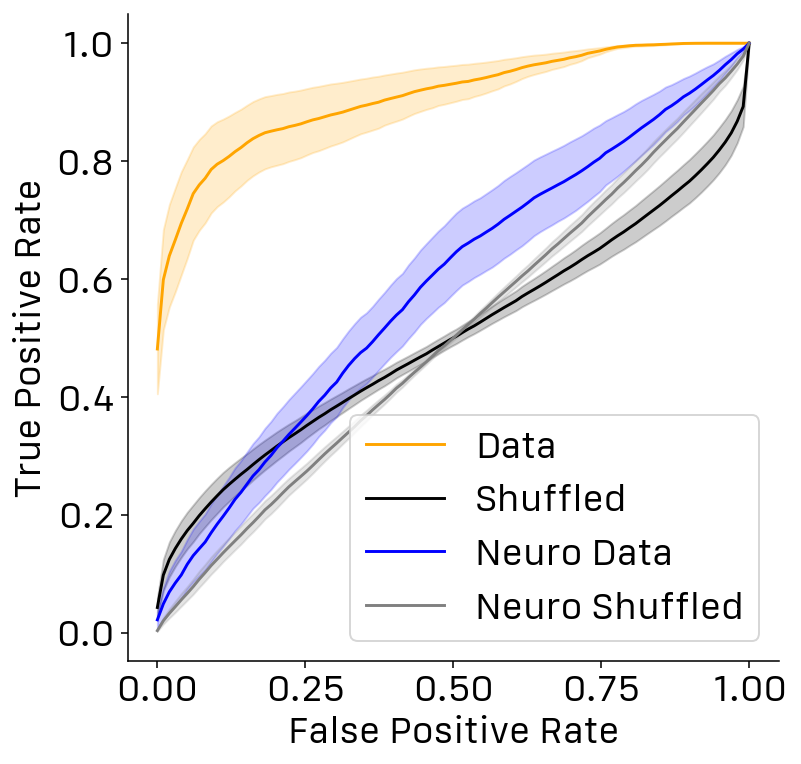

In [ ]:
# Initialize results storage

roc_data = {}  # Store per-mouse ROC data
shuffled_roc_data = {}  # Store per-mouse shuffled ROC data
neuro_roc_data = {}  # Store per-mouse ROC data for neural data
shuffled_neuro_roc_data = {}  # Store per-mouse shuffled ROC data for neural data

num_repeats = 10  # number of under-sampling repeats

for efile, sfile in zip(epm_files, sam_files):
    epm = pd.read_csv(efile)
    sam = pd.read_csv(sfile)
    id = epm['ID'].iloc[0]

    # Label assignment
    epm['exploration'] = np.where(epm['In Closed Arms'] == 1, 0, 1)
    sam['exploration'] = np.where(sam['In black'] == 1, 0, 1)

    epm = epm[['Zscoreg', 'Zscorer', 'Time', 'exploration', 'ID']]
    sam = sam[['Zscoreg', 'Zscorer', 'Time', 'exploration', 'ID']]

    window_size = 300

    X_train, y_train = create_sliding_window(sam, signal_col='Zscoreg', target_col='exploration', window_size=window_size)
    X_test, y_test = create_sliding_window(epm, signal_col='Zscoreg', target_col='exploration', window_size=window_size)

    neuro_X_train, neuro_y_train = create_sliding_window(sam, signal_col='Zscorer', target_col='exploration', window_size=window_size)
    neuro_X_test, neuro_y_test = create_sliding_window(epm, signal_col='Zscorer', target_col='exploration', window_size=window_size)

    mouse_roc_curves = []  # Store ROC curves for each repeat
    shuffled_roc_curves = []  # Store shuffled ROC curves for each repeat

    neuro_mouse_roc_curves = []  # Store ROC curves for neural data
    shuffled_neuro_roc_curves = []  # Store shuffled ROC curves for neural data


    for repeat_idx in range(num_repeats):
        print(f"Repeat {repeat_idx + 1}/{num_repeats}")

        # Random undersampling
        undersampler = RandomUnderSampler(random_state=repeat_idx, sampling_strategy=1)
        X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

        # Hyperparameter tuning
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
        lr_model = LogisticRegression(penalty='l2', random_state=42, max_iter=5000, class_weight='balanced', solver='liblinear')
        grid_search = GridSearchCV(lr_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_resampled, y_train_resampled)

        # Get best model
        best_model = grid_search.best_estimator_
        best_model.fit(X_train_resampled, y_train_resampled)
        
        # Predict probabilities for AUC-ROC calculation
        y_pred_proba = best_model.predict_proba(X_test)
        y_pred = best_model.predict(X_test)

        # Compute AUC-ROC
        auc_roc = roc_auc_score(y_test, y_pred_proba[:, 1])

        # Compute ROC curve and store it
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
        mouse_roc_curves.append((fpr, tpr))

        # Shuffle and evaluate
        num_permutations = 50
        shuffled_ind_roc_curves = []

        for i in range(num_permutations):
            np.random.seed(42 + i)
            np.random.shuffle(y_train_resampled)

            best_model.fit(X_train_resampled, y_train_resampled)
            y_pred_shuffled_proba = best_model.predict_proba(X_test)
            y_pred_shuffled = best_model.predict(X_test)

            shuffled_auc_roc = roc_auc_score(y_test, y_pred_shuffled_proba[:, 1])

            # Compute ROC curve and store it
            shuffled_ind_fpr, shuffled_ind_tpr, _ = roc_curve(y_test, y_pred_shuffled_proba[:, 1])
            shuffled_ind_roc_curves.append((shuffled_ind_fpr, shuffled_ind_tpr))

        ####### NEURO PART #####


        # Random undersampling
        undersampler = RandomUnderSampler(random_state=repeat_idx, sampling_strategy=1)
        neuro_X_train_resampled, neuro_y_train_resampled = undersampler.fit_resample(neuro_X_train, neuro_y_train)

        # Hyperparameter tuning
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
        lr_model = LogisticRegression(penalty='l2', random_state=42, max_iter=5000, class_weight='balanced', solver='liblinear')
        grid_search = GridSearchCV(lr_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(neuro_X_train_resampled, neuro_y_train_resampled)

        # Get best model
        neuro_best_model = grid_search.best_estimator_
        neuro_best_model.fit(neuro_X_train_resampled, neuro_y_train_resampled)
        
        # Predict probabilities for AUC-ROC calculation
        neuro_y_pred_proba = neuro_best_model.predict_proba(neuro_X_test)
        neuro_y_pred = neuro_best_model.predict(neuro_X_test)

        # Compute AUC-ROC
        neuro_auc_roc = roc_auc_score(neuro_y_test, neuro_y_pred_proba[:, 1])

        # Compute ROC curve and store it
        neuro_fpr, neuro_tpr, _ = roc_curve(neuro_y_test, neuro_y_pred_proba[:, 1])
        neuro_mouse_roc_curves.append((neuro_fpr, neuro_tpr))

        # Shuffle and evaluate
        num_permutations = 50
        shuffled_neuro_ind_roc_curves = []

        for i in range(num_permutations):
            np.random.seed(42 + i)
            np.random.shuffle(neuro_y_train_resampled)

            neuro_best_model.fit(neuro_X_train_resampled, neuro_y_train_resampled)
            neuro_y_pred_shuffled_proba = neuro_best_model.predict_proba(neuro_X_test)
            neuro_y_pred_shuffled = neuro_best_model.predict(neuro_X_test)

            shuffled_neuro_auc_roc = roc_auc_score(neuro_y_test, neuro_y_pred_shuffled_proba[:, 1])

            # Compute ROC curve and store it
            shuffled_neuro_ind_fpr, shuffled_neuro_ind_tpr, _ = roc_curve(neuro_y_test, neuro_y_pred_shuffled_proba[:, 1])
            shuffled_neuro_ind_roc_curves.append((shuffled_neuro_ind_fpr, shuffled_neuro_ind_tpr))

        

    # Compute per-mouse average ROC
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    shuffled_trps = []
    neuro_tprs = []
    shuffled_neuro_tprs = []

    for shuffled_fpr, shuffled_tpr in shuffled_ind_roc_curves:
        interp_tpr = np.interp(mean_fpr, shuffled_fpr, shuffled_tpr)
        shuffled_trps.append(interp_tpr)

    for fpr, tpr in mouse_roc_curves:
        interp_tpr = np.interp(mean_fpr, fpr, tpr)  # Interpolate TPR values
        tprs.append(interp_tpr)

    for shuffled_neuro_fpr, shuffled_neuro_tpr in shuffled_neuro_ind_roc_curves:
        interp_neuro_tpr = np.interp(mean_fpr, shuffled_neuro_fpr, shuffled_neuro_tpr)
        shuffled_neuro_tprs.append(interp_neuro_tpr)

    for neuro_fpr, neuro_tpr in neuro_mouse_roc_curves:
        interp_neuro_tpr = np.interp(mean_fpr, neuro_fpr, neuro_tpr)
        neuro_tprs.append(interp_neuro_tpr)

    mean_tpr = np.mean(tprs, axis=0)
    mean_shuffled_tpr = np.mean(shuffled_trps, axis=0)
    std_tpr = np.std(tprs, axis=0)
    shuffled_std_tpr = np.std(shuffled_trps, axis=0)

    mean_neuro_tpr = np.mean(neuro_tprs, axis=0)
    mean_shuffled_neuro_tpr = np.mean(shuffled_neuro_tprs, axis=0)
    std_neuro_tpr = np.std(neuro_tprs, axis=0)
    shuffled_std_neuro_tpr = np.std(shuffled_neuro_tprs, axis=0)

    # plt.plot(mean_fpr, mean_tpr, color='orange', alpha=0.2)  
    # plt.plot(mean_fpr, mean_shuffled_tpr, color='black', alpha=0.2)

    roc_data[id] = (mean_fpr, mean_tpr, std_tpr)
    shuffled_roc_data[id] = (mean_fpr, mean_shuffled_tpr, shuffled_std_tpr)
    neuro_roc_data[id] = (mean_fpr, mean_neuro_tpr, std_neuro_tpr)
    shuffled_neuro_roc_data[id] = (mean_fpr, mean_shuffled_neuro_tpr, shuffled_std_neuro_tpr)



# Compute overall mean ROC curve across mice
all_mean_tprs = []
shuffled_all_mean_tprs = []
all_mean_fprs = np.linspace(0, 1, 100)

neuro_all_mean_tprs = []
shuffled_neuro_all_mean_tprs = []


for mouse_id in shuffled_roc_data:
    shuffled_all_mean_tprs.append(np.interp(all_mean_fprs, shuffled_roc_data[mouse_id][0], shuffled_roc_data[mouse_id][1]))

shuffled_final_mean_tpr = np.mean(shuffled_all_mean_tprs, axis=0)
shuffled_final_sem_tpr = np.std(shuffled_all_mean_tprs, axis=0) / np.sqrt(len(shuffled_all_mean_tprs))

for mouse_id in roc_data:
    all_mean_tprs.append(np.interp(all_mean_fprs, roc_data[mouse_id][0], roc_data[mouse_id][1]))

final_mean_tpr = np.mean(all_mean_tprs, axis=0)
final_sem_tpr = np.std(all_mean_tprs, axis=0) / np.sqrt(len(all_mean_tprs))

for mouse_id in neuro_roc_data:
    neuro_all_mean_tprs.append(np.interp(all_mean_fprs, neuro_roc_data[mouse_id][0], neuro_roc_data[mouse_id][1]))
final_neuro_mean_tpr = np.mean(neuro_all_mean_tprs, axis=0)
final_neuro_sem_tpr = np.std(neuro_all_mean_tprs, axis=0) / np.sqrt(len(neuro_all_mean_tprs))

for mouse_id in shuffled_neuro_roc_data:
    shuffled_neuro_all_mean_tprs.append(np.interp(all_mean_fprs, shuffled_neuro_roc_data[mouse_id][0], shuffled_neuro_roc_data[mouse_id][1]))
shuffled_final_neuro_mean_tpr = np.mean(shuffled_neuro_all_mean_tprs, axis=0)
shuffled_final_neuro_sem_tpr = np.std(shuffled_neuro_all_mean_tprs, axis=0) / np.sqrt(len(shuffled_neuro_all_mean_tprs))


# Plot mean ROC curve with standard deviation

plt.figure(figsize=(6, 6))
plt.plot(all_mean_fprs, final_mean_tpr, color='orange', label='Data')
plt.plot(all_mean_fprs, shuffled_final_mean_tpr, color='black', label='Shuffled')
plt.fill_between(all_mean_fprs, final_mean_tpr - final_sem_tpr, final_mean_tpr + final_sem_tpr, color='orange', alpha=0.2)
plt.fill_between(all_mean_fprs, shuffled_final_mean_tpr - shuffled_final_sem_tpr, shuffled_final_mean_tpr + shuffled_final_sem_tpr, color='black', alpha=0.2)

plt.plot(all_mean_fprs, final_neuro_mean_tpr, color='blue', label='Neuro Data')
plt.plot(all_mean_fprs, shuffled_final_neuro_mean_tpr, color='gray', label='Neuro Shuffled')
plt.fill_between(all_mean_fprs, final_neuro_mean_tpr - final_neuro_sem_tpr, final_neuro_mean_tpr + final_neuro_sem_tpr, color='blue', alpha=0.2)
plt.fill_between(all_mean_fprs, shuffled_final_neuro_mean_tpr - shuffled_final_neuro_sem_tpr, shuffled_final_neuro_mean_tpr + shuffled_final_neuro_sem_tpr, color='gray', alpha=0.2)

# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.6)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()










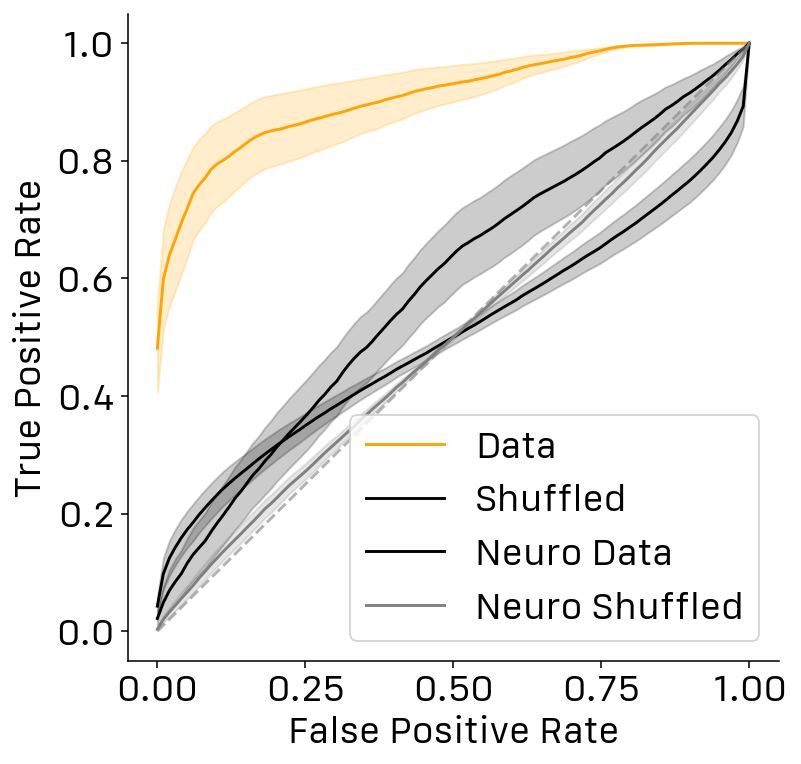

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(all_mean_fprs, final_mean_tpr, color='orange', label='Data')
plt.plot(all_mean_fprs, shuffled_final_mean_tpr, color='black', label='Shuffled')
plt.fill_between(all_mean_fprs, final_mean_tpr - final_sem_tpr, final_mean_tpr + final_sem_tpr, color='orange', alpha=0.2)
plt.fill_between(all_mean_fprs, shuffled_final_mean_tpr - shuffled_final_sem_tpr, shuffled_final_mean_tpr + shuffled_final_sem_tpr, color='black', alpha=0.2)

plt.plot(all_mean_fprs, final_neuro_mean_tpr, color='black', label='Neuro Data')
plt.plot(all_mean_fprs, shuffled_final_neuro_mean_tpr, color='gray', label='Neuro Shuffled')
plt.fill_between(all_mean_fprs, final_neuro_mean_tpr - final_neuro_sem_tpr, final_neuro_mean_tpr + final_neuro_sem_tpr, color='black', alpha=0.2)
plt.fill_between(all_mean_fprs, shuffled_final_neuro_mean_tpr - shuffled_final_neuro_sem_tpr, shuffled_final_neuro_mean_tpr + shuffled_final_neuro_sem_tpr, color='gray', alpha=0.2)

# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.6)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.6, label='Unity Line')  # Unity line
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/Neuro_EPMtoSAM_ROC_curveC.pdf', format='pdf')
plt.show()


## EPM + SAM to Y Maze

### First explo

Repeat 1/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 2/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 3/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 4/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 5/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 6/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 7/10
Repeat 8/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 9/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 10/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 1/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 2/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 3/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 4/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 5/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 6/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 7/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 8/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 9/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 10/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 1/10
Repeat 2/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 3/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 4/10
Repeat 5/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 6/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 7/10
Repeat 8/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 9/10
Repeat 10/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 5/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 1/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 2/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 3/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 4/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 5/10
Repeat 6/10
Repeat 7/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 8/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 9/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 10/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 2/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 3/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 4/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 5/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 6/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 7/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 8/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 9/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 10/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
     Accuracy  Precision    Recall        F1      1_f1      0_f1   AUC_ROC  \
ID                                                                           
63   1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
64   1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
65   0.895652   0.915051  0.895652  0.893101  0.910383  0.874247  1.000000   
66   0.637736   0.835374  0.637736  0.642111  0.649473  0.625086  0.783446   
67   1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
68   1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
71   1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
84   1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
151  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
152  1.000000   1.000

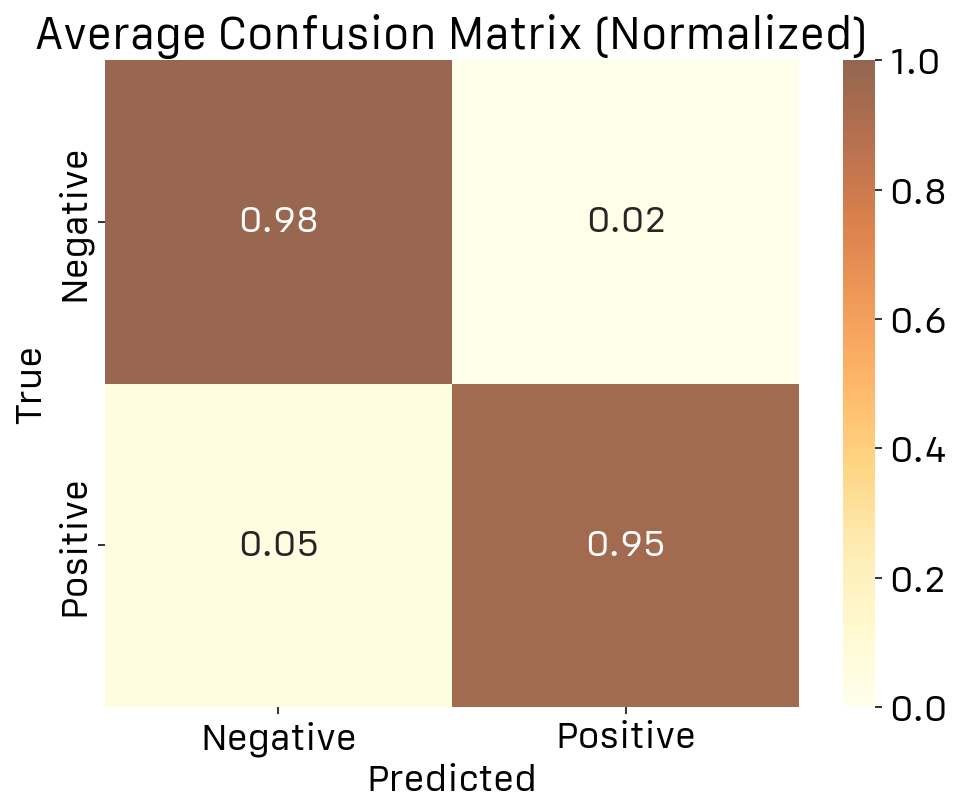

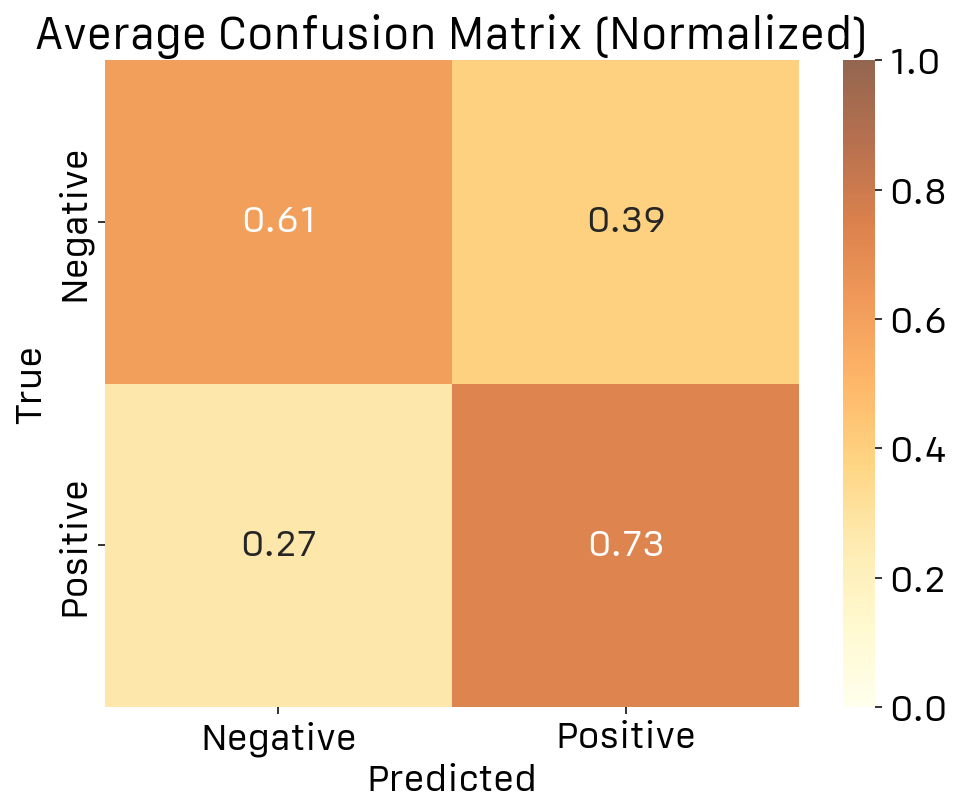

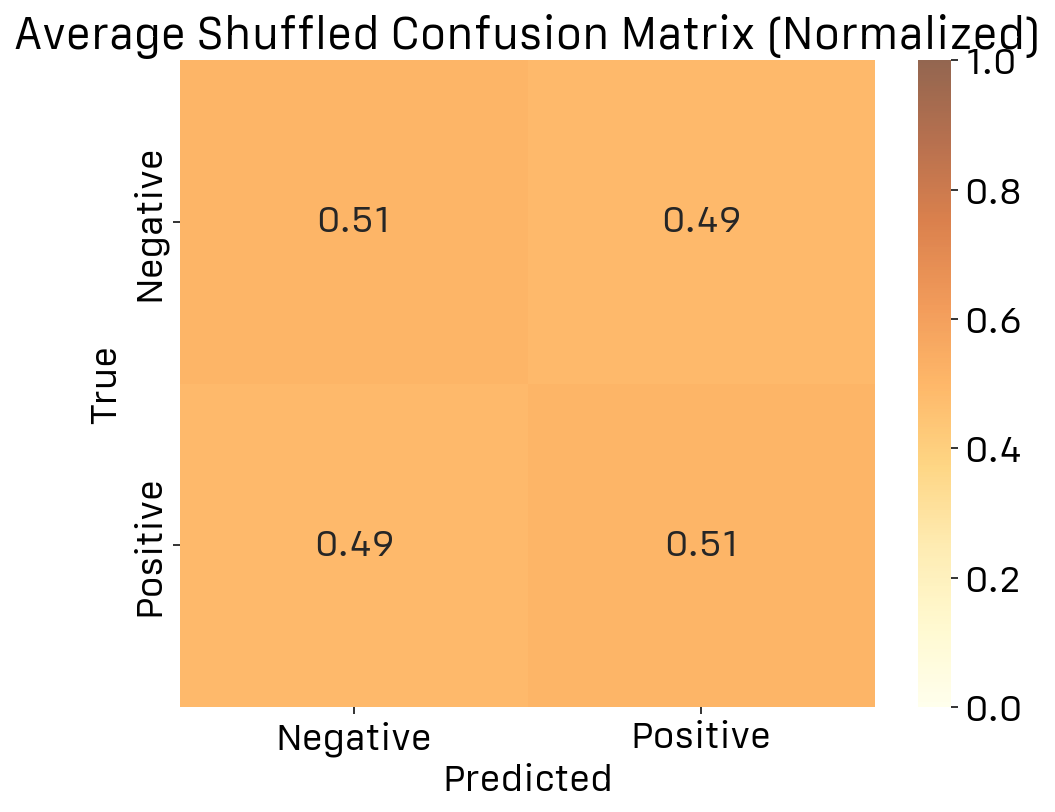

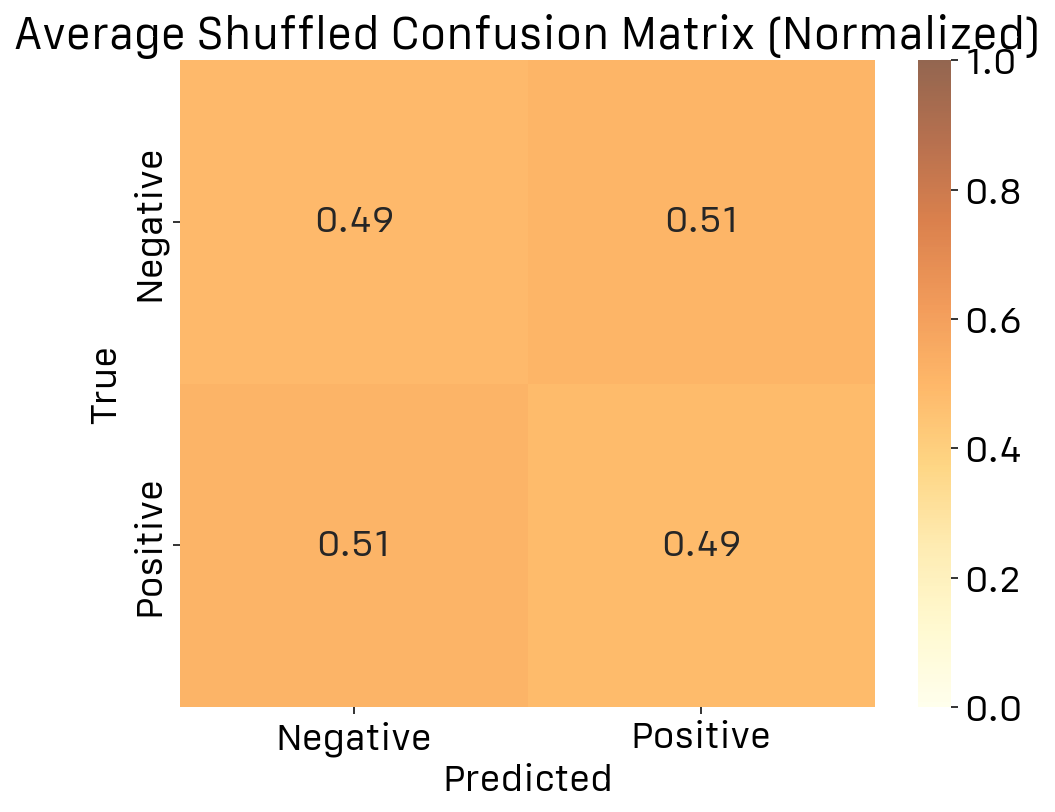

In [ ]:
### DECODER FIRST EXPLO NEURO VS ASTRO 

#SAM
directory = '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/sam/preprocessed'
sam_files = glob.glob(os.path.join(directory, "*.csv"))

sam_files

#EPM 
directory = '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/epm/JrGECO_EPM/preprocessed'
epm_files = glob.glob(os.path.join(directory, "*.csv"))

epm_files


#Ymaze

directory = '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/ymaze/preprocessed'
ymaze_files = glob.glob(os.path.join(directory, "*.csv"))

ymaze_files


# Initialize results storage
confusion_matrices = []
confusion_matrices_neuro = []
shuffled_confusion_matrices = []
shuffled_confusion_matrices_neuro = []

results = {'ID': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': [], '1_f1': [], '0_f1': [], 'AUC_ROC': [], 'Neuro_Accuracy': [], 
              'Neuro_Precision': [], 'Neuro_Recall': [], 'Neuro_F1': [], 'Neuro_1_f1': [], 'Neuro_0_f1': [], 'Neuro_AUC_ROC': [],
           'Shuffled_ID': [], 'Shuffled_Accuracy': [], 'Shuffled_Precision': [], 'Shuffled_Recall': [],
           'Shuffled_F1': [], 'Shuffled_1_f1': [], 'Shuffled_0_f1': [], 'Shuffled_AUC_ROC': [], 
           'Neuro_Shuffled_Accuracy': [], 'Neuro_Shuffled_Precision': [], 'Neuro_Shuffled_Recall': [],
           'Neuro_Shuffled_F1': [], 'Neuro_Shuffled_1_f1': [], 'Neuro_Shuffled_0_f1': [], 'Neuro_Shuffled_AUC_ROC': []}

num_repeats = 10  # number of under-sampling repeats


for efile, sfile, yfile in zip(epm_files, sam_files, ymaze_files):
    epm = pd.read_csv(efile)
    sam = pd.read_csv(sfile)

    ym = pd.read_csv(yfile)

    id=epm['ID'].iloc[0]

    # Preprocess epm data
    epm.loc[epm['In Closed Arms'] == 1, 'exploration'] = 0
    epm.loc[epm['In Closed Arms'] == 0, 'exploration'] = 1
    epm = epm[['Zscoreg', 'Zscorer', 'Time', 'exploration', 'ID']]

    # Preprocess sam data
    sam.loc[sam['In black'] == 1, 'exploration'] = 0
    sam.loc[sam['In black'] == 0, 'exploration'] = 1
    sam = sam[['Zscoreg', 'Zscorer', 'Time', 'exploration', 'ID']]

    # Concat epm + sam
    epm_sam = pd.concat([epm, sam], axis=0)


    # Preprocess ym data


    ym['In farm'] = 0
    ym.loc[(ym['In larm'] == 1) | (ym['In rarm'] == 1), 'In farm'] = 1


  
    explostart = ym[(ym['In Novelarm'].shift() == 0) & (ym['In Novelarm'] == 1)].index[0]
    exploend = ym[(ym['In Novelarm'].shift() == 1) & (ym['In Novelarm'] == 0)].index[0]

    ymtest = ym.loc[explostart:]

    nexplostart = ymtest[(ymtest['In farm'].shift() == 0) & (ymtest['In farm'] == 1)].index
    nexploend = ymtest[(ymtest['In farm'].shift() == 1) & (ymtest['In farm'] == 0)].index

    validnexplostart = []
    validnexploend = []

    for start, end in zip(nexplostart, nexploend):
        if end-start > 300:  ### keep only the first explo that fits the 5 seconds criterion
            validnexplostart.append(start)
            validnexploend.append(end)


    ymfirstexplo = pd.concat([ym.loc[explostart:exploend], ym.loc[validnexplostart[0]:validnexploend[0]]])


    ymfirstexplo['exploration'] = 0
    ymfirstexplo.loc[ymfirstexplo['In Novelarm'] == 1, 'exploration'] = 1

    ### dataset against other explo 

    ymotherexplo = ym.loc[validnexploend[0]:]
    ymotherexplo = ymotherexplo[(ymotherexplo['In Novelarm'] == 1) | (ymotherexplo['In farm'] == 1)]


    ymotherexplo['exploration'] = 0
    ymotherexplo.loc[ymotherexplo['In Novelarm'] == 1, 'exploration'] = 1
    ymotherexplo.loc[ymotherexplo['In farm'] == 1, 'exploration'] = 0



    # Parameters
    window_size = 300  # Sliding window size

    # Prepare training and testing datasets
    X_train, y_train = create_sliding_window(epm_sam, signal_col='Zscoreg', target_col='exploration', window_size=window_size)
    neuro_X_train, neuro_y_train = create_sliding_window(epm_sam, signal_col='Zscorer', target_col='exploration', window_size=window_size)
    X_testfirstexplo, y_testfirstexplo = create_sliding_window(ymfirstexplo, signal_col='Zscoreg', target_col='exploration', window_size=window_size)
    neuro_X_testfirstexplo, neuro_y_testfirstexplo = create_sliding_window(ymfirstexplo, signal_col='Zscorer', target_col='exploration', window_size=window_size)

    for repeat_idx in range(num_repeats):
        print(f"Repeat {repeat_idx + 1}/{num_repeats}")

        ## Model training ##############################

        # Random undersampling
        undersampler = RandomUnderSampler(random_state=repeat_idx, sampling_strategy=1)
        X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

        # Hyperparameter tuning
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
        lr_model = LogisticRegression(penalty='l2', random_state=42, max_iter=5000, class_weight='balanced', solver='liblinear')
        grid_search = GridSearchCV(lr_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_resampled, y_train_resampled)

        # Get best model
        best_model = grid_search.best_estimator_
        best_model.fit(X_train_resampled, y_train_resampled)

         ## Model evaluation FIRST explo ##############################

        # Predict probabilities for AUC-ROC calculation
        y_pred_proba = best_model.predict_proba(X_testfirstexplo)

        y_pred = best_model.predict(X_testfirstexplo)

        # Compute AUC-ROC
        auc_roc = roc_auc_score(y_testfirstexplo, y_pred_proba[:, 1])

        # Evaluate model
        cm = confusion_matrix(y_testfirstexplo, y_pred, normalize='true')
        confusion_matrices.append(cm)

        report = classification_report(y_testfirstexplo, y_pred, output_dict=True)
        results['ID'].append(id)
        results['Accuracy'].append(report['accuracy'])
        results['Precision'].append(report['weighted avg']['precision'])
        results['Recall'].append(report['weighted avg']['recall'])
        results['F1'].append(report['weighted avg']['f1-score'])
        results['1_f1'].append(report['1']['f1-score'])
        results['0_f1'].append(report['0']['f1-score'])
        results['AUC_ROC'].append(auc_roc)


        # Shuffle and evaluate
        num_permutations = 50
        shuffled_cm_list = []
        shuffled_results_list = []

        for i in range(num_permutations):
            np.random.seed(42 + i)
            np.random.shuffle(y_train_resampled)

            ####### astrocytes

            best_model.fit(X_train_resampled, y_train_resampled)
            y_pred_shuffled_proba = best_model.predict_proba(X_testfirstexplo)
            y_pred_shuffled = best_model.predict(X_testfirstexplo)

            shuffled_auc_roc = roc_auc_score(y_testfirstexplo, y_pred_shuffled_proba[:, 1])

            shuffled_report = classification_report(y_testfirstexplo, y_pred_shuffled, output_dict=True)
            shuffled_results_list.append({
                'Shuffled_Accuracy': shuffled_report['accuracy'],
                'Shuffled_Precision': shuffled_report['weighted avg']['precision'],
                'Shuffled_Recall': shuffled_report['weighted avg']['recall'],
                'Shuffled_F1': shuffled_report['weighted avg']['f1-score'],
                'Shuffled_1_f1': shuffled_report['1']['f1-score'],
                'Shuffled_0_f1': shuffled_report['0']['f1-score'],
                'Shuffled_AUC_ROC': shuffled_auc_roc
            })

            cm_shuffled = confusion_matrix(y_testfirstexplo, y_pred_shuffled, normalize='true')
            shuffled_cm_list.append(cm_shuffled)


        avg_shuffled_cm = np.mean(shuffled_cm_list, axis=0)
        shuffled_average_results = {
            key: np.mean([res[key] for res in shuffled_results_list]) for key in shuffled_results_list[0]
        }
        results['Shuffled_ID'].append(id)
        results['Shuffled_Accuracy'].append(shuffled_average_results['Shuffled_Accuracy'])
        results['Shuffled_Precision'].append(shuffled_average_results['Shuffled_Precision'])
        results['Shuffled_Recall'].append(shuffled_average_results['Shuffled_Recall'])
        results['Shuffled_F1'].append(shuffled_average_results['Shuffled_F1'])
        results['Shuffled_1_f1'].append(shuffled_average_results['Shuffled_1_f1'])
        results['Shuffled_0_f1'].append(shuffled_average_results['Shuffled_0_f1'])
        results['Shuffled_AUC_ROC'].append(shuffled_average_results['Shuffled_AUC_ROC'])


        shuffled_confusion_matrices.append(avg_shuffled_cm)

        ### NEURO PART #####

        # Random undersampling
        undersampler = RandomUnderSampler(random_state=repeat_idx, sampling_strategy=1)
        neuro_X_train_resampled, neuro_y_train_resampled = undersampler.fit_resample(neuro_X_train, neuro_y_train)

        # Hyperparameter tuning
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
        lr_model = LogisticRegression(penalty='l2', random_state=42, max_iter=5000, class_weight='balanced', solver='liblinear')
        grid_search = GridSearchCV(lr_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(neuro_X_train_resampled, neuro_y_train_resampled)

        # Get best model
        neuro_best_model = grid_search.best_estimator_
        neuro_best_model.fit(neuro_X_train_resampled, neuro_y_train_resampled)

        # Predict probabilities for AUC-ROC calculation
        neuro_y_pred_proba = neuro_best_model.predict_proba(neuro_X_testfirstexplo)
        neuro_y_pred = neuro_best_model.predict(neuro_X_testfirstexplo)

        # Compute AUC-ROC
        auc_roc2 = roc_auc_score(neuro_y_testfirstexplo, neuro_y_pred_proba[:, 1])

        # Evaluate model
        cm2 = confusion_matrix(neuro_y_testfirstexplo, neuro_y_pred, normalize='true')
        confusion_matrices_neuro.append(cm2)

        report = classification_report(neuro_y_testfirstexplo, neuro_y_pred, output_dict=True)
        results['Neuro_Accuracy'].append(report['accuracy'])
        results['Neuro_Precision'].append(report['weighted avg']['precision'])
        results['Neuro_Recall'].append(report['weighted avg']['recall'])
        results['Neuro_F1'].append(report['weighted avg']['f1-score'])
        results['Neuro_1_f1'].append(report['1']['f1-score'])
        results['Neuro_0_f1'].append(report['0']['f1-score'])
        results['Neuro_AUC_ROC'].append(auc_roc2)


        # Shuffle and evaluate
        num_permutations = 50
        shuffled_cm_list2 = []
        shuffled_results_list2 = []

        for i in range(num_permutations):
            np.random.seed(42 + i)
            np.random.shuffle(neuro_y_train_resampled)

            neuro_best_model.fit(neuro_X_train_resampled, neuro_y_train_resampled)
            neuro_y_pred_shuffled_proba = neuro_best_model.predict_proba(neuro_X_testfirstexplo)
            neuro_y_pred_shuffled = neuro_best_model.predict(neuro_X_testfirstexplo)

            shuffled_auc_roc2 = roc_auc_score(neuro_y_testfirstexplo, neuro_y_pred_shuffled_proba[:, 1])

            shuffled_report2 = classification_report(neuro_y_testfirstexplo, neuro_y_pred_shuffled, output_dict=True)
            
            shuffled_results_list2.append({
                'Shuffled_Accuracy2': shuffled_report2['accuracy'],
                'Shuffled_Precision2': shuffled_report2['weighted avg']['precision'],
                'Shuffled_Recall2': shuffled_report2['weighted avg']['recall'],
                'Shuffled_F12': shuffled_report2['weighted avg']['f1-score'],
                'Shuffled_1_f12': shuffled_report2['1']['f1-score'],
                'Shuffled_0_f12': shuffled_report2['0']['f1-score'],
                'Shuffled_AUC_ROC2': shuffled_auc_roc2
            })

            cm_shuffled2 = confusion_matrix(neuro_y_testfirstexplo, neuro_y_pred_shuffled, normalize='true')
            shuffled_cm_list2.append(cm_shuffled2)

        avg_shuffled_cm2 = np.mean(shuffled_cm_list2, axis=0)
        shuffled_average_results2 = {
            key: np.mean([res[key] for res in shuffled_results_list2]) for key in shuffled_results_list2[0]
        }

        results['Neuro_Shuffled_Accuracy'].append(shuffled_average_results2['Shuffled_Accuracy2'])
        results['Neuro_Shuffled_Precision'].append(shuffled_average_results2['Shuffled_Precision2'])
        results['Neuro_Shuffled_Recall'].append(shuffled_average_results2['Shuffled_Recall2'])
        results['Neuro_Shuffled_F1'].append(shuffled_average_results2['Shuffled_F12'])
        results['Neuro_Shuffled_1_f1'].append(shuffled_average_results2['Shuffled_1_f12'])
        results['Neuro_Shuffled_0_f1'].append(shuffled_average_results2['Shuffled_0_f12'])
        results['Neuro_Shuffled_AUC_ROC'].append(shuffled_average_results2['Shuffled_AUC_ROC2'])

        shuffled_confusion_matrices_neuro.append(avg_shuffled_cm2)



# Average confusion matrices
average_cm = np.mean(confusion_matrices, axis=0)
average_cm2 = np.mean(confusion_matrices_neuro, axis=0)
shuffled_average_cm = np.mean(shuffled_confusion_matrices, axis=0)
shuffled_average_cm2 = np.mean(shuffled_confusion_matrices_neuro, axis=0)

# Calculate average results for each ID
average_results = pd.DataFrame(results).groupby('ID').mean()
print(average_results)

# Plot confusion matrices

#### DATA FIRST EXPLO
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='YlOrBr', alpha=0.7, vmin=0, vmax=1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix (Normalized)')
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/EPMSAM_CM_firstexplo.pdf', format='pdf')
plt.show()


### DATA NEURO EXPLO
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm2, annot=True, fmt='.2f', cmap='YlOrBr', alpha=0.7, vmin=0, vmax=1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix (Normalized)')
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/EPMSAM_CM_otherexplo.pdf', format='pdf')
plt.show()

### SHUFFLED FIRST EXPLO
plt.figure(figsize=(8, 6))
sns.heatmap(shuffled_average_cm, annot=True, fmt='.2f', cmap='YlOrBr', alpha=0.7, vmin=0, vmax=1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Shuffled Confusion Matrix (Normalized)')
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/EPMSAM_CM_firstexploSHUFFLED.pdf', format='pdf')
plt.show()

### SHUFFLED NEURO FIRST EXPLO

plt.figure(figsize=(8, 6))
sns.heatmap(shuffled_average_cm2, annot=True, fmt='.2f', cmap='YlOrBr', alpha=0.7, vmin=0, vmax=1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Shuffled Confusion Matrix (Normalized)')
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/EPMSAM_CM_otherexploSHUFFLED.pdf', format='pdf')
plt.show()

Accuracy          0.953339
Neuro_Accuracy    0.692823
dtype: float64
Accuracy          0.036568
Neuro_Accuracy    0.048745
dtype: float64
TtestResult(statistic=np.float64(4.275165103309505), pvalue=np.float64(0.0004555056492039445), df=np.float64(18.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/243672859.py:27: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


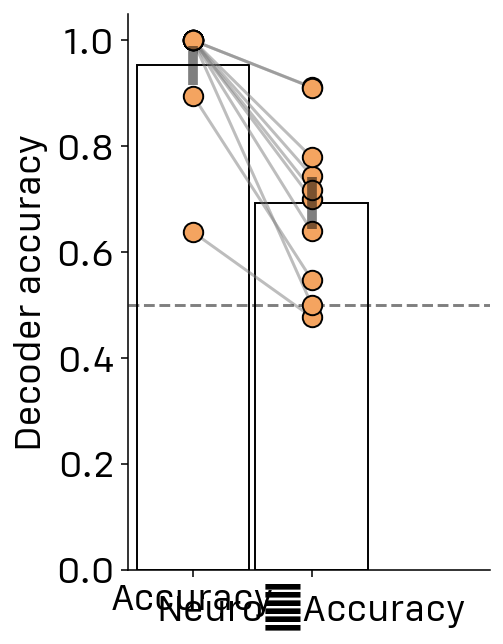

In [ ]:
df = pd.DataFrame(average_results)
df2=df.copy()


plt.figure(figsize=(4,5))
conditions = ['Accuracy', 'Neuro_Accuracy']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['Accuracy'], df['Neuro_Accuracy'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['Accuracy'], row['Neuro_Accuracy']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder accuracy')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeFIRST_Accuracy.pdf', format='pdf')
plt.show()

F1          0.953521
Neuro_F1    0.665982
dtype: float64
F1          0.036195
Neuro_F1    0.058343
dtype: float64
TtestResult(statistic=np.float64(4.187961714997631), pvalue=np.float64(0.0005528075661524338), df=np.float64(18.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/1194180269.py:27: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/1194180269.py:28: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeFIRST_F1.pdf', format='pdf')
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


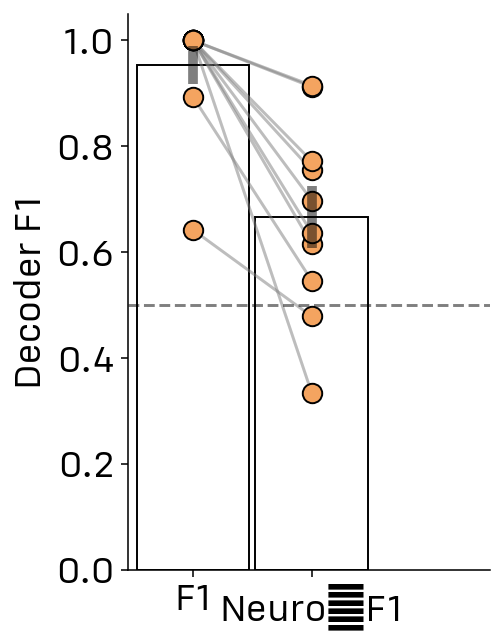

In [ ]:
df = pd.DataFrame(average_results)
df2=df.copy()


plt.figure(figsize=(4,5))
conditions = ['F1', 'Neuro_F1']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['F1'], df['Neuro_F1'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['F1'], row['Neuro_F1']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder F1')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeFIRST_F1.pdf', format='pdf')
plt.show()

Precision          0.975043
Neuro_Precision    0.712794
dtype: float64
Precision          0.017666
Neuro_Precision    0.064058
dtype: float64
TtestResult(statistic=np.float64(3.9465869985219193), pvalue=np.float64(0.0009459436111295358), df=np.float64(18.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/3515694155.py:26: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/3515694155.py:27: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeFIRST_precision.pdf', format='pdf')
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


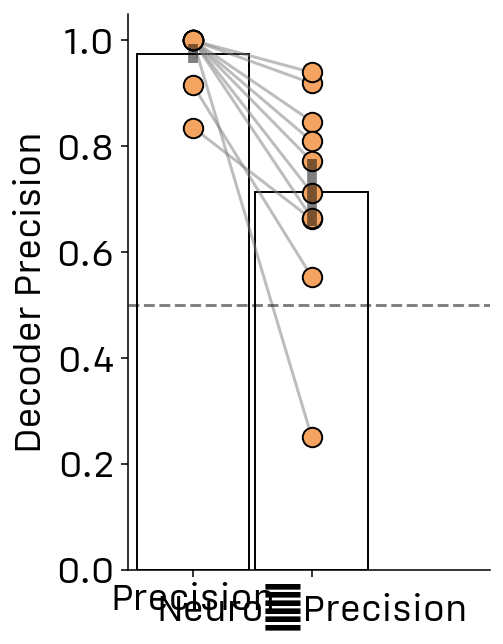

In [ ]:
df = pd.DataFrame(average_results)
df2 = df.copy()

plt.figure(figsize=(4, 5))
conditions = ['Precision', 'Neuro_Precision']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['Precision'], df['Neuro_Precision'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
    zorder=0)
for condition in conditions:
    plt.scatter([condition] * len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['Precision'], row['Neuro_Precision']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder Precision')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55, 3 - 0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeFIRST_precision.pdf', format='pdf')
plt.show()

Recall          0.953339
Neuro_Recall    0.692823
dtype: float64
Recall          0.036568
Neuro_Recall    0.048745
dtype: float64
TtestResult(statistic=np.float64(4.275165103309505), pvalue=np.float64(0.0004555056492039445), df=np.float64(18.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/1423190548.py:26: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/1423190548.py:27: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeFIRST_recall.pdf', format='pdf')
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


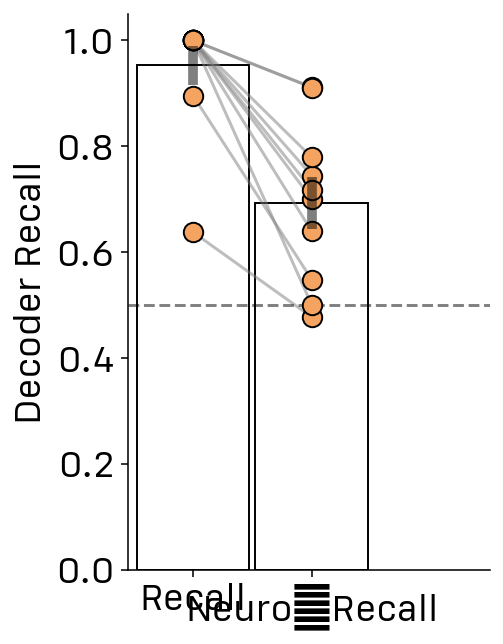

In [ ]:

df = pd.DataFrame(average_results)
df2 = df.copy()

plt.figure(figsize=(4,5))
conditions = ['Recall', 'Neuro_Recall']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['Recall'], df['Neuro_Recall'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['Recall'], row['Neuro_Recall']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder Recall')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeFIRST_recall.pdf', format='pdf')
plt.show()

AUC_ROC          0.978345
Neuro_AUC_ROC    0.683697
dtype: float64
AUC_ROC          0.021655
Neuro_AUC_ROC    0.109176
dtype: float64
TtestResult(statistic=np.float64(2.647248588407421), pvalue=np.float64(0.016383858572449474), df=np.float64(18.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/1085792844.py:26: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/1085792844.py:27: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeFIRST_AUCROC.pdf', format='pdf')
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


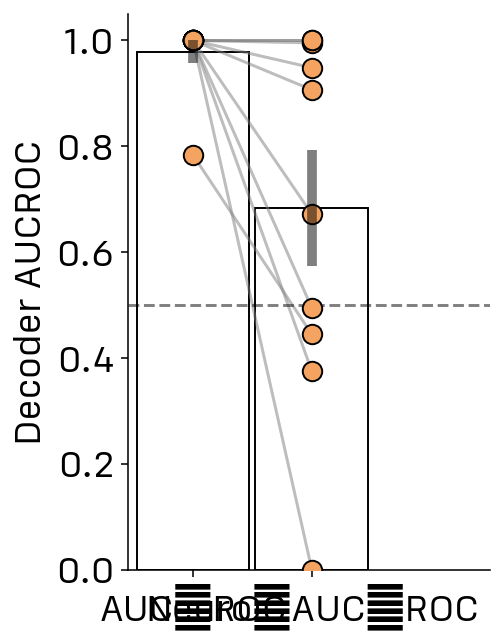

In [ ]:

df = pd.DataFrame(average_results)
df2 = df.copy()

plt.figure(figsize=(4,5))
conditions = ['AUC_ROC', 'Neuro_AUC_ROC']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['AUC_ROC'], df['Neuro_AUC_ROC'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['AUC_ROC'], row['Neuro_AUC_ROC']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder AUCROC')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeFIRST_AUCROC.pdf', format='pdf')
plt.show()

### other explo 

Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 2/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 3/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 4/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 5/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 6/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 7/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 8/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 9/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 10/10


/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10
     Accuracy  Precision    Recall        F1      1_f1      0_f1   AUC_ROC  \
ID                                                                         

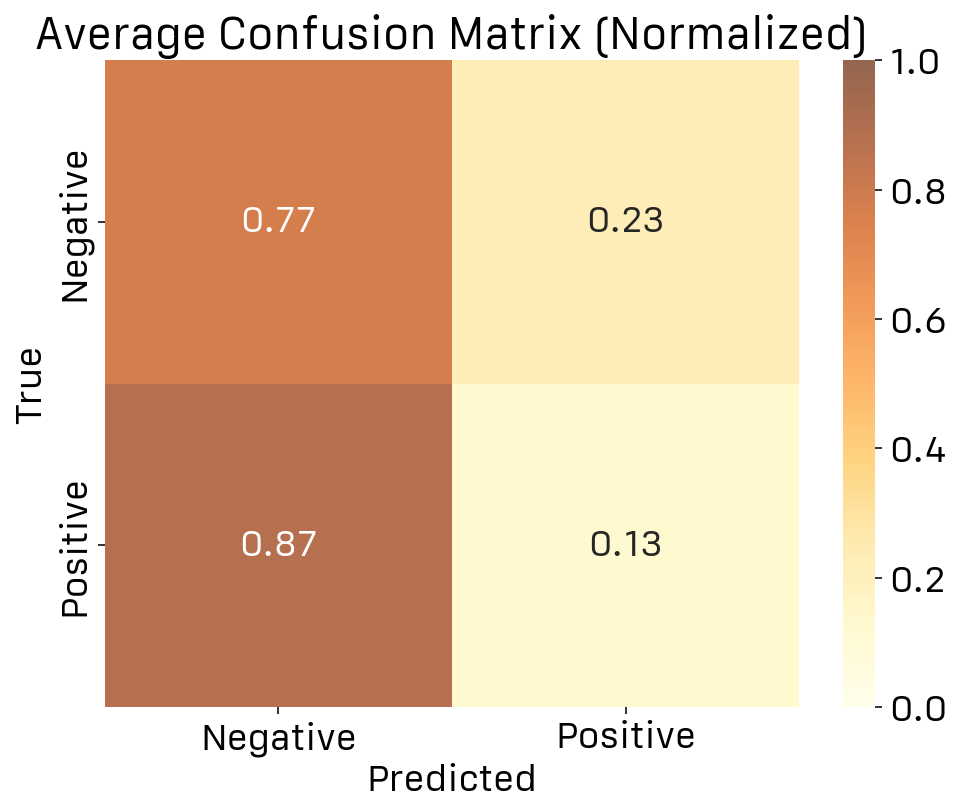

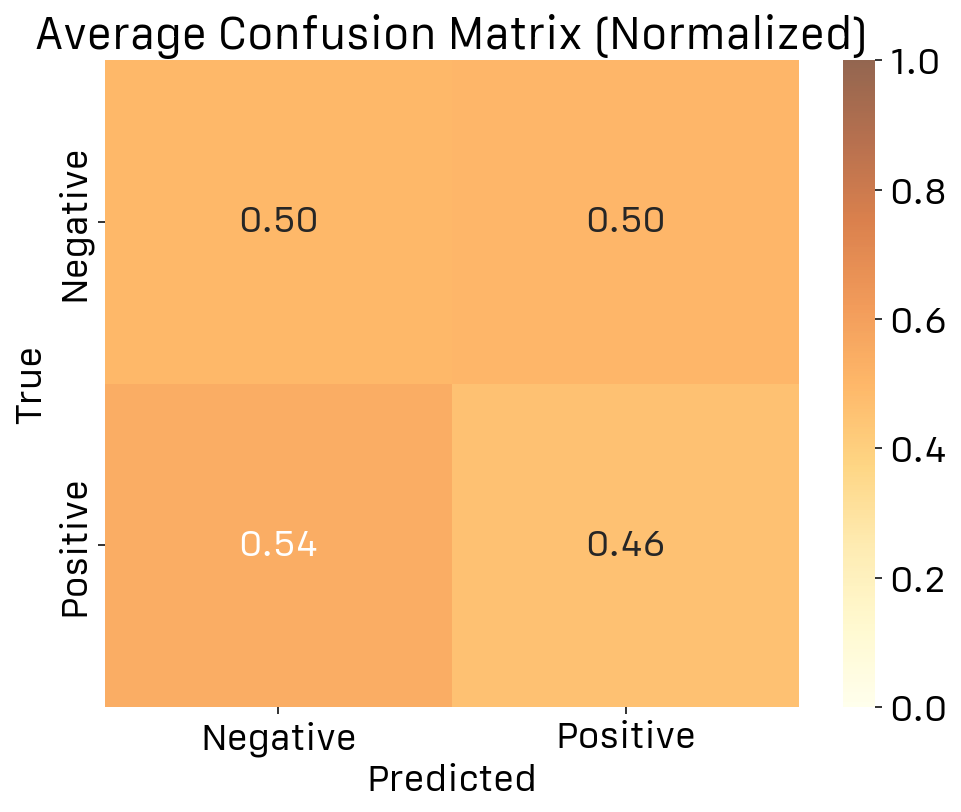

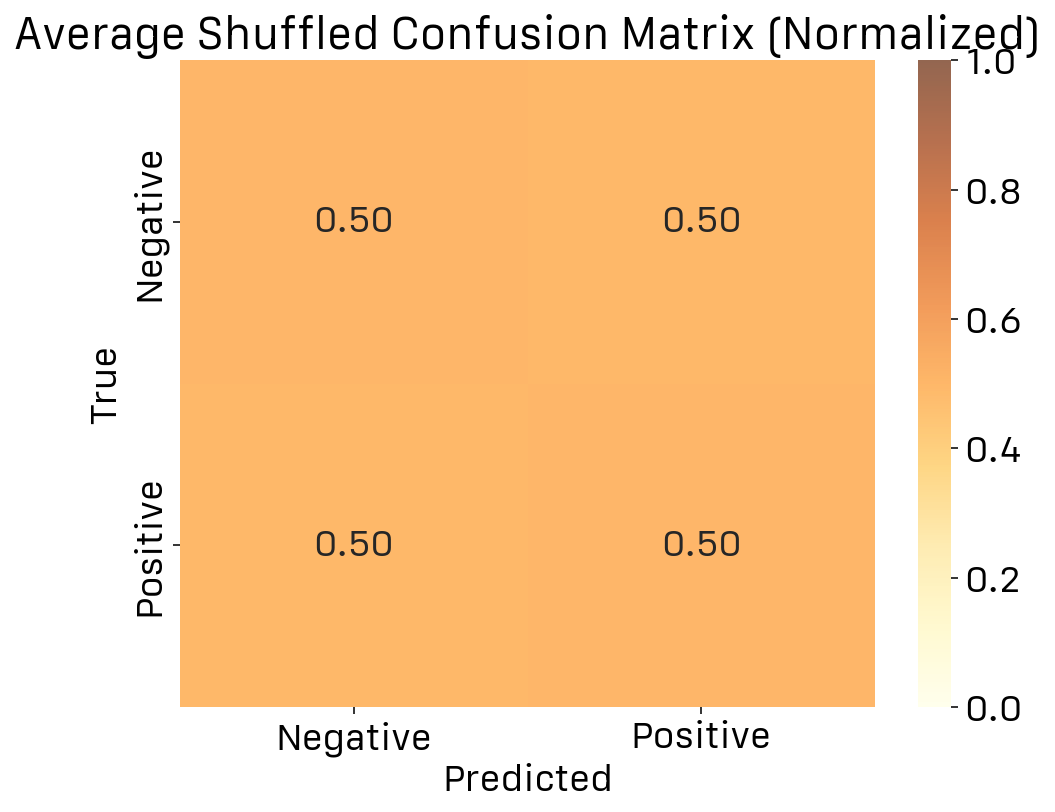

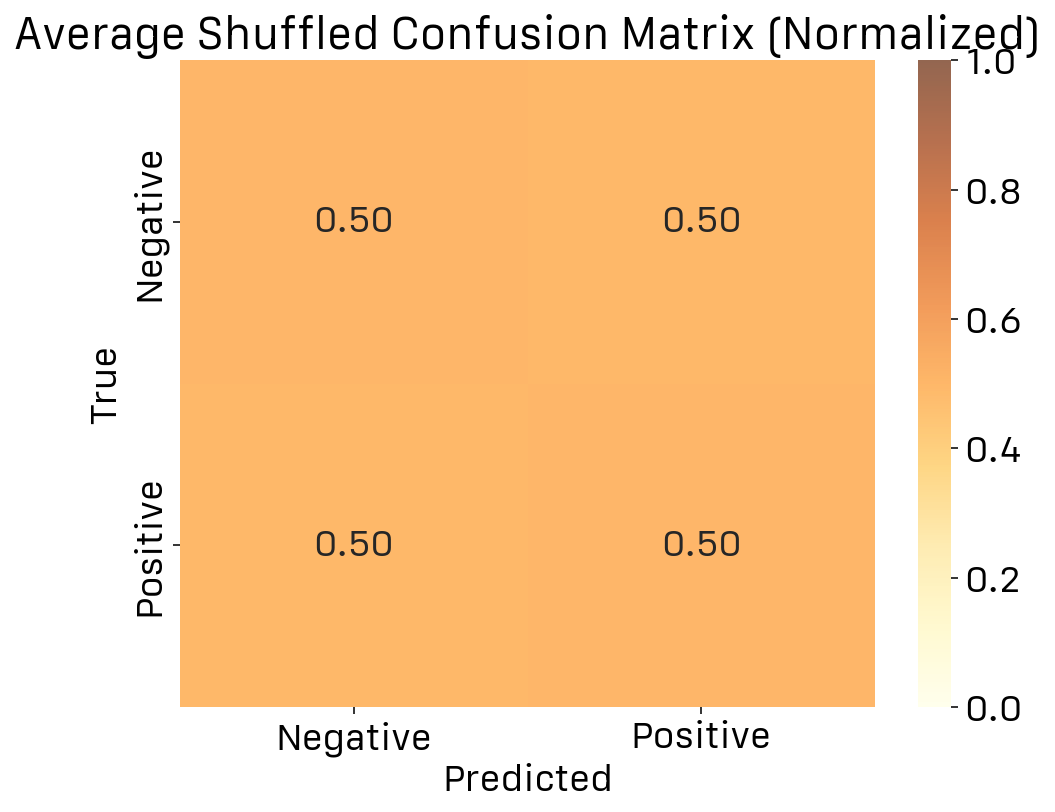

In [ ]:
### DECODER OTHER EXPLO NEURO VS ASTRO 

#SAM
directory = '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/sam/preprocessed'
sam_files = glob.glob(os.path.join(directory, "*.csv"))

sam_files

#EPM 
directory = '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/epm/JrGECO_EPM/preprocessed'
epm_files = glob.glob(os.path.join(directory, "*.csv"))

epm_files


#Ymaze

directory = '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/jRGECO/ymaze/preprocessed'
ymaze_files = glob.glob(os.path.join(directory, "*.csv"))

ymaze_files


# Initialize results storage
confusion_matrices = []
confusion_matrices_neuro = []
shuffled_confusion_matrices = []
shuffled_confusion_matrices_neuro = []

results = {'ID': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': [], '1_f1': [], '0_f1': [], 'AUC_ROC': [], 'Neuro_Accuracy': [], 
              'Neuro_Precision': [], 'Neuro_Recall': [], 'Neuro_F1': [], 'Neuro_1_f1': [], 'Neuro_0_f1': [], 'Neuro_AUC_ROC': [],
           'Shuffled_ID': [], 'Shuffled_Accuracy': [], 'Shuffled_Precision': [], 'Shuffled_Recall': [],
           'Shuffled_F1': [], 'Shuffled_1_f1': [], 'Shuffled_0_f1': [], 'Shuffled_AUC_ROC': [], 
           'Neuro_Shuffled_Accuracy': [], 'Neuro_Shuffled_Precision': [], 'Neuro_Shuffled_Recall': [],
           'Neuro_Shuffled_F1': [], 'Neuro_Shuffled_1_f1': [], 'Neuro_Shuffled_0_f1': [], 'Neuro_Shuffled_AUC_ROC': []}

num_repeats = 10  # number of under-sampling repeats


for efile, sfile, yfile in zip(epm_files, sam_files, ymaze_files):
    epm = pd.read_csv(efile)
    sam = pd.read_csv(sfile)

    ym = pd.read_csv(yfile)

    id=epm['ID'].iloc[0]

    # Preprocess epm data
    epm.loc[epm['In Closed Arms'] == 1, 'exploration'] = 0
    epm.loc[epm['In Closed Arms'] == 0, 'exploration'] = 1
    epm = epm[['Zscoreg', 'Zscorer', 'Time', 'exploration', 'ID']]

    # Preprocess sam data
    sam.loc[sam['In black'] == 1, 'exploration'] = 0
    sam.loc[sam['In black'] == 0, 'exploration'] = 1
    sam = sam[['Zscoreg', 'Zscorer', 'Time', 'exploration', 'ID']]

    # Concat epm + sam
    epm_sam = pd.concat([epm, sam], axis=0)


    # Preprocess ym data


    ym['In farm'] = 0
    ym.loc[(ym['In larm'] == 1) | (ym['In rarm'] == 1), 'In farm'] = 1


  
    explostart = ym[(ym['In Novelarm'].shift() == 0) & (ym['In Novelarm'] == 1)].index[0]
    exploend = ym[(ym['In Novelarm'].shift() == 1) & (ym['In Novelarm'] == 0)].index[0]

    ymtest = ym.loc[explostart:]

    nexplostart = ymtest[(ymtest['In farm'].shift() == 0) & (ymtest['In farm'] == 1)].index
    nexploend = ymtest[(ymtest['In farm'].shift() == 1) & (ymtest['In farm'] == 0)].index

    validnexplostart = []
    validnexploend = []

    for start, end in zip(nexplostart, nexploend):
        if end-start > 300:  ### keep only the first explo that fits the 5 seconds criterion
            validnexplostart.append(start)
            validnexploend.append(end)


    ymfirstexplo = pd.concat([ym.loc[explostart:exploend], ym.loc[validnexplostart[0]:validnexploend[0]]])


    ymfirstexplo['exploration'] = 0
    ymfirstexplo.loc[ymfirstexplo['In Novelarm'] == 1, 'exploration'] = 1

    ### dataset against other explo 

    ymotherexplo = ym.loc[validnexploend[0]:]
    ymotherexplo = ymotherexplo[(ymotherexplo['In Novelarm'] == 1) | (ymotherexplo['In farm'] == 1)]


    ymotherexplo['exploration'] = 0
    ymotherexplo.loc[ymotherexplo['In Novelarm'] == 1, 'exploration'] = 1
    ymotherexplo.loc[ymotherexplo['In farm'] == 1, 'exploration'] = 0



    # Parameters
    window_size = 300  # Sliding window size

    # Prepare training and testing datasets
    X_train, y_train = create_sliding_window(epm_sam, signal_col='Zscoreg', target_col='exploration', window_size=window_size)
    neuro_X_train, neuro_y_train = create_sliding_window(epm_sam, signal_col='Zscorer', target_col='exploration', window_size=window_size)
    X_testfirstexplo, y_testfirstexplo = create_sliding_window(ymotherexplo, signal_col='Zscoreg', target_col='exploration', window_size=window_size)
    neuro_X_testfirstexplo, neuro_y_testfirstexplo = create_sliding_window(ymotherexplo, signal_col='Zscorer', target_col='exploration', window_size=window_size)

    for repeat_idx in range(num_repeats):
        print(f"Repeat {repeat_idx + 1}/{num_repeats}")

        ## Model training ##############################

        # Random undersampling
        undersampler = RandomUnderSampler(random_state=repeat_idx, sampling_strategy=1)
        X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

        # Hyperparameter tuning
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
        lr_model = LogisticRegression(penalty='l2', random_state=42, max_iter=5000, class_weight='balanced', solver='liblinear')
        grid_search = GridSearchCV(lr_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_resampled, y_train_resampled)

        # Get best model
        best_model = grid_search.best_estimator_
        best_model.fit(X_train_resampled, y_train_resampled)

         ## Model evaluation FIRST explo ##############################

        # Predict probabilities for AUC-ROC calculation
        y_pred_proba = best_model.predict_proba(X_testfirstexplo)

        y_pred = best_model.predict(X_testfirstexplo)

        # Compute AUC-ROC
        auc_roc = roc_auc_score(y_testfirstexplo, y_pred_proba[:, 1])

        # Evaluate model
        cm = confusion_matrix(y_testfirstexplo, y_pred, normalize='true')
        confusion_matrices.append(cm)

        report = classification_report(y_testfirstexplo, y_pred, output_dict=True)
        results['ID'].append(id)
        results['Accuracy'].append(report['accuracy'])
        results['Precision'].append(report['weighted avg']['precision'])
        results['Recall'].append(report['weighted avg']['recall'])
        results['F1'].append(report['weighted avg']['f1-score'])
        results['1_f1'].append(report['1']['f1-score'])
        results['0_f1'].append(report['0']['f1-score'])
        results['AUC_ROC'].append(auc_roc)


        # Shuffle and evaluate
        num_permutations = 50
        shuffled_cm_list = []
        shuffled_results_list = []

        for i in range(num_permutations):
            np.random.seed(42 + i)
            np.random.shuffle(y_train_resampled)

            ####### astrocytes

            best_model.fit(X_train_resampled, y_train_resampled)
            y_pred_shuffled_proba = best_model.predict_proba(X_testfirstexplo)
            y_pred_shuffled = best_model.predict(X_testfirstexplo)

            shuffled_auc_roc = roc_auc_score(y_testfirstexplo, y_pred_shuffled_proba[:, 1])

            shuffled_report = classification_report(y_testfirstexplo, y_pred_shuffled, output_dict=True)
            shuffled_results_list.append({
                'Shuffled_Accuracy': shuffled_report['accuracy'],
                'Shuffled_Precision': shuffled_report['weighted avg']['precision'],
                'Shuffled_Recall': shuffled_report['weighted avg']['recall'],
                'Shuffled_F1': shuffled_report['weighted avg']['f1-score'],
                'Shuffled_1_f1': shuffled_report['1']['f1-score'],
                'Shuffled_0_f1': shuffled_report['0']['f1-score'],
                'Shuffled_AUC_ROC': shuffled_auc_roc
            })

            cm_shuffled = confusion_matrix(y_testfirstexplo, y_pred_shuffled, normalize='true')
            shuffled_cm_list.append(cm_shuffled)


        avg_shuffled_cm = np.mean(shuffled_cm_list, axis=0)
        shuffled_average_results = {
            key: np.mean([res[key] for res in shuffled_results_list]) for key in shuffled_results_list[0]
        }
        results['Shuffled_ID'].append(id)
        results['Shuffled_Accuracy'].append(shuffled_average_results['Shuffled_Accuracy'])
        results['Shuffled_Precision'].append(shuffled_average_results['Shuffled_Precision'])
        results['Shuffled_Recall'].append(shuffled_average_results['Shuffled_Recall'])
        results['Shuffled_F1'].append(shuffled_average_results['Shuffled_F1'])
        results['Shuffled_1_f1'].append(shuffled_average_results['Shuffled_1_f1'])
        results['Shuffled_0_f1'].append(shuffled_average_results['Shuffled_0_f1'])
        results['Shuffled_AUC_ROC'].append(shuffled_average_results['Shuffled_AUC_ROC'])


        shuffled_confusion_matrices.append(avg_shuffled_cm)

        ### NEURO PART #####

        # Random undersampling
        undersampler = RandomUnderSampler(random_state=repeat_idx, sampling_strategy=1)
        neuro_X_train_resampled, neuro_y_train_resampled = undersampler.fit_resample(neuro_X_train, neuro_y_train)

        # Hyperparameter tuning
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
        lr_model = LogisticRegression(penalty='l2', random_state=42, max_iter=5000, class_weight='balanced', solver='liblinear')
        grid_search = GridSearchCV(lr_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(neuro_X_train_resampled, neuro_y_train_resampled)

        # Get best model
        neuro_best_model = grid_search.best_estimator_
        neuro_best_model.fit(neuro_X_train_resampled, neuro_y_train_resampled)

        # Predict probabilities for AUC-ROC calculation
        neuro_y_pred_proba = neuro_best_model.predict_proba(neuro_X_testfirstexplo)
        neuro_y_pred = neuro_best_model.predict(neuro_X_testfirstexplo)

        # Compute AUC-ROC
        auc_roc2 = roc_auc_score(neuro_y_testfirstexplo, neuro_y_pred_proba[:, 1])

        # Evaluate model
        cm2 = confusion_matrix(neuro_y_testfirstexplo, neuro_y_pred, normalize='true')
        confusion_matrices_neuro.append(cm2)

        report = classification_report(neuro_y_testfirstexplo, neuro_y_pred, output_dict=True)
        results['Neuro_Accuracy'].append(report['accuracy'])
        results['Neuro_Precision'].append(report['weighted avg']['precision'])
        results['Neuro_Recall'].append(report['weighted avg']['recall'])
        results['Neuro_F1'].append(report['weighted avg']['f1-score'])
        results['Neuro_1_f1'].append(report['1']['f1-score'])
        results['Neuro_0_f1'].append(report['0']['f1-score'])
        results['Neuro_AUC_ROC'].append(auc_roc2)


        # Shuffle and evaluate
        num_permutations = 50
        shuffled_cm_list2 = []
        shuffled_results_list2 = []

        for i in range(num_permutations):
            np.random.seed(42 + i)
            np.random.shuffle(neuro_y_train_resampled)

            neuro_best_model.fit(neuro_X_train_resampled, neuro_y_train_resampled)
            neuro_y_pred_shuffled_proba = neuro_best_model.predict_proba(neuro_X_testfirstexplo)
            neuro_y_pred_shuffled = neuro_best_model.predict(neuro_X_testfirstexplo)

            shuffled_auc_roc2 = roc_auc_score(neuro_y_testfirstexplo, neuro_y_pred_shuffled_proba[:, 1])

            shuffled_report2 = classification_report(neuro_y_testfirstexplo, neuro_y_pred_shuffled, output_dict=True)
            
            shuffled_results_list2.append({
                'Shuffled_Accuracy2': shuffled_report2['accuracy'],
                'Shuffled_Precision2': shuffled_report2['weighted avg']['precision'],
                'Shuffled_Recall2': shuffled_report2['weighted avg']['recall'],
                'Shuffled_F12': shuffled_report2['weighted avg']['f1-score'],
                'Shuffled_1_f12': shuffled_report2['1']['f1-score'],
                'Shuffled_0_f12': shuffled_report2['0']['f1-score'],
                'Shuffled_AUC_ROC2': shuffled_auc_roc2
            })

            cm_shuffled2 = confusion_matrix(neuro_y_testfirstexplo, neuro_y_pred_shuffled, normalize='true')
            shuffled_cm_list2.append(cm_shuffled2)

        avg_shuffled_cm2 = np.mean(shuffled_cm_list2, axis=0)
        shuffled_average_results2 = {
            key: np.mean([res[key] for res in shuffled_results_list2]) for key in shuffled_results_list2[0]
        }

        results['Neuro_Shuffled_Accuracy'].append(shuffled_average_results2['Shuffled_Accuracy2'])
        results['Neuro_Shuffled_Precision'].append(shuffled_average_results2['Shuffled_Precision2'])
        results['Neuro_Shuffled_Recall'].append(shuffled_average_results2['Shuffled_Recall2'])
        results['Neuro_Shuffled_F1'].append(shuffled_average_results2['Shuffled_F12'])
        results['Neuro_Shuffled_1_f1'].append(shuffled_average_results2['Shuffled_1_f12'])
        results['Neuro_Shuffled_0_f1'].append(shuffled_average_results2['Shuffled_0_f12'])
        results['Neuro_Shuffled_AUC_ROC'].append(shuffled_average_results2['Shuffled_AUC_ROC2'])

        shuffled_confusion_matrices_neuro.append(avg_shuffled_cm2)



# Average confusion matrices
average_cm = np.mean(confusion_matrices, axis=0)
average_cm2 = np.mean(confusion_matrices_neuro, axis=0)
shuffled_average_cm = np.mean(shuffled_confusion_matrices, axis=0)
shuffled_average_cm2 = np.mean(shuffled_confusion_matrices_neuro, axis=0)

# Calculate average results for each ID
average_results = pd.DataFrame(results).groupby('ID').mean()
print(average_results)

# Plot confusion matrices

#### DATA FIRST EXPLO
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='YlOrBr', alpha=0.7, vmin=0, vmax=1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix (Normalized)')
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/EPMSAM_CM_firstexplo.pdf', format='pdf')
plt.show()


### DATA NEURO EXPLO
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm2, annot=True, fmt='.2f', cmap='YlOrBr', alpha=0.7, vmin=0, vmax=1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix (Normalized)')
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/EPMSAM_CM_otherexplo.pdf', format='pdf')
plt.show()

### SHUFFLED FIRST EXPLO
plt.figure(figsize=(8, 6))
sns.heatmap(shuffled_average_cm, annot=True, fmt='.2f', cmap='YlOrBr', alpha=0.7, vmin=0, vmax=1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Shuffled Confusion Matrix (Normalized)')
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/EPMSAM_CM_firstexploSHUFFLED.pdf', format='pdf')
plt.show()

### SHUFFLED NEURO FIRST EXPLO

plt.figure(figsize=(8, 6))
sns.heatmap(shuffled_average_cm2, annot=True, fmt='.2f', cmap='YlOrBr', alpha=0.7, vmin=0, vmax=1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Shuffled Confusion Matrix (Normalized)')
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/EPMSAM_CM_otherexploSHUFFLED.pdf', format='pdf')
plt.show()

Accuracy          0.536444
Neuro_Accuracy    0.485120
dtype: float64
Accuracy          0.040760
Neuro_Accuracy    0.037473
dtype: float64
TtestResult(statistic=np.float64(0.9269650496480132), pvalue=np.float64(0.36620788705456353), df=np.float64(18.0))
ASTRO VS SHUFFLED TtestResult(statistic=np.float64(0.8084720503985485), pvalue=np.float64(0.4293754835678709), df=np.float64(18.0))
NEURO VS SHUFFLED TtestResult(statistic=np.float64(-0.41274570811382977), pvalue=np.float64(0.684667677761209), df=np.float64(18.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/728851380.py:29: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


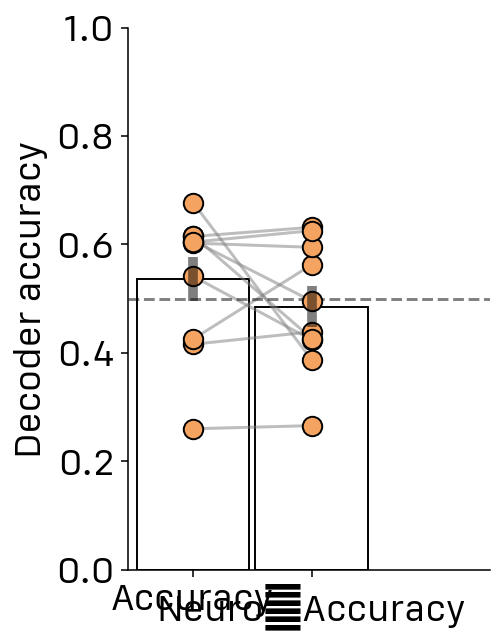

In [ ]:
df = pd.DataFrame(average_results)
df2=df.copy()

plt.figure(figsize=(4,5))
conditions = ['Accuracy', 'Neuro_Accuracy']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['Accuracy'], df['Neuro_Accuracy'])
print(ttest_results)

print('ASTRO VS SHUFFLED', ttest_ind(df['Accuracy'], df['Shuffled_Accuracy']) )
print('NEURO VS SHUFFLED', ttest_ind(df['Neuro_Accuracy'], df['Neuro_Shuffled_Accuracy']) )

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['Accuracy'], row['Neuro_Accuracy']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder accuracy')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeOTHER_Accuracy.pdf', format='pdf')
plt.show()

F1          0.497617
Neuro_F1    0.502604
dtype: float64
F1          0.046353
Neuro_F1    0.041472
dtype: float64
TtestResult(statistic=np.float64(-0.08017809110800601), pvalue=np.float64(0.9369803322521517), df=np.float64(18.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/2335717562.py:27: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


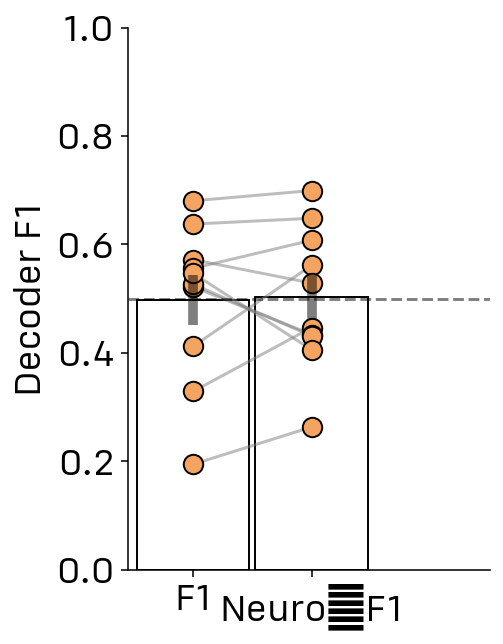

In [ ]:
df = pd.DataFrame(average_results)
df2=df.copy()


plt.figure(figsize=(4,5))
conditions = ['F1', 'Neuro_F1']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['F1'], df['Neuro_F1'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['F1'], row['Neuro_F1']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder F1')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.tight_layout()
# plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeOTHER_F1.pdf', format='pdf')
plt.show()

Precision          0.528674
Neuro_Precision    0.563015
dtype: float64
Precision          0.052615
Neuro_Precision    0.052646
dtype: float64
TtestResult(statistic=np.float64(-0.46137673417342034), pvalue=np.float64(0.6500549267483917), df=np.float64(18.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/3543622336.py:26: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/3543622336.py:27: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeOTHER_precision.pdf', format='pdf')
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


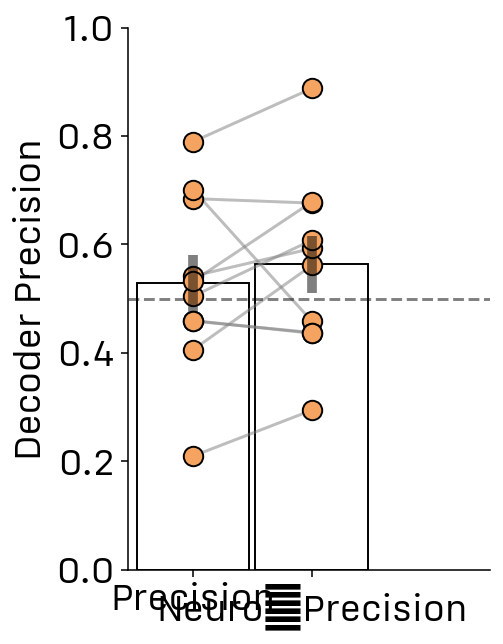

In [ ]:
df = pd.DataFrame(average_results)
df2 = df.copy()

plt.figure(figsize=(4, 5))
conditions = ['Precision', 'Neuro_Precision']
print(means)
means = df[conditions].mean(axis=0)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['Precision'], df['Neuro_Precision'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
    zorder=0)
for condition in conditions:
    plt.scatter([condition] * len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['Precision'], row['Neuro_Precision']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder Precision')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55, 3 - 0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeOTHER_precision.pdf', format='pdf')
plt.show()

Recall          0.536444
Neuro_Recall    0.485120
dtype: float64
Recall          0.040760
Neuro_Recall    0.037473
dtype: float64
TtestResult(statistic=np.float64(0.9269650496480131), pvalue=np.float64(0.36620788705456353), df=np.float64(18.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/3059177690.py:27: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/3059177690.py:28: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeOTHER_recall.pdf', format='pdf')
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


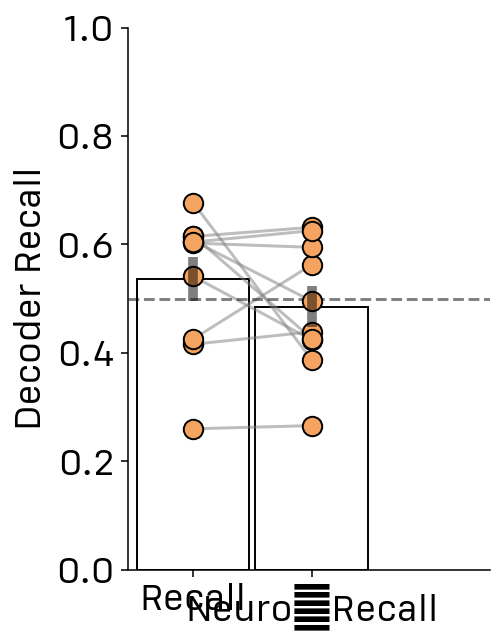

In [ ]:

df = pd.DataFrame(average_results)
df2 = df.copy()
# print(df)

plt.figure(figsize=(4,5))
conditions = ['Recall', 'Neuro_Recall']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['Recall'], df['Neuro_Recall'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['Recall'], row['Neuro_Recall']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder Recall')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeOTHER_recall.pdf', format='pdf')
plt.show()

AUC_ROC          0.462973
Neuro_AUC_ROC    0.467574
dtype: float64
AUC_ROC          0.044048
Neuro_AUC_ROC    0.057313
dtype: float64
TtestResult(statistic=np.float64(-0.06366454659340126), pvalue=np.float64(0.9499390176638811), df=np.float64(18.0))


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/1370058520.py:27: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.tight_layout()
/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_74037/1370058520.py:28: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeOTHER_AUCROC.pdf', format='pdf')
/Users/ossamaghenissa/fpenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 95 (_) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


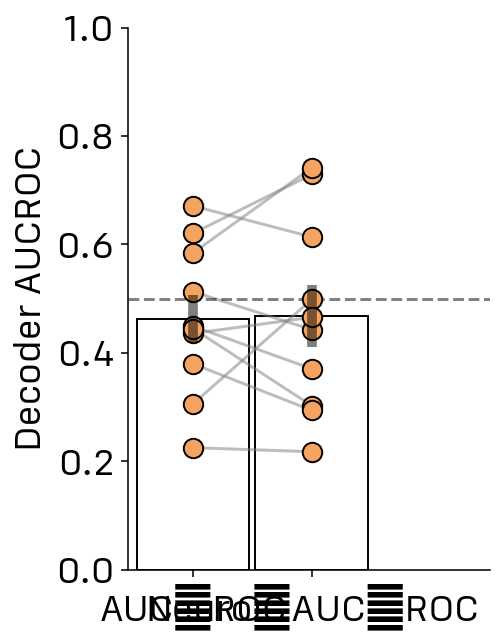

In [ ]:

df = pd.DataFrame(average_results)
df2 = df.copy()


plt.figure(figsize=(4,5))
conditions = ['AUC_ROC', 'Neuro_AUC_ROC']
means = df[conditions].mean(axis=0)
print(means)
sems = df[conditions].sem(axis=0)
print(sems)
ttest_results = ttest_ind(df['AUC_ROC'], df['Neuro_AUC_ROC'])
print(ttest_results)

plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
for condition in conditions:
    plt.scatter([condition]*len(df), df[condition], color='sandybrown', edgecolor='black', s=100, zorder=3)
    for i, row in df.iterrows():
        plt.plot([conditions[0], conditions[1]], [row['AUC_ROC'], row['Neuro_AUC_ROC']], color='gray', alpha=0.3, zorder=1)

plt.ylabel('Decoder AUCROC')
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
ax.set_xlim(-0.55,3-0.5)
plt.yticks([0, .2, .4, .6, .8, 1])
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/decoder/jrgeco/Ymaze/firstexplo/YmazeOTHER_AUCROC.pdf', format='pdf')
plt.show()